# California Housing Median Value Regression Project

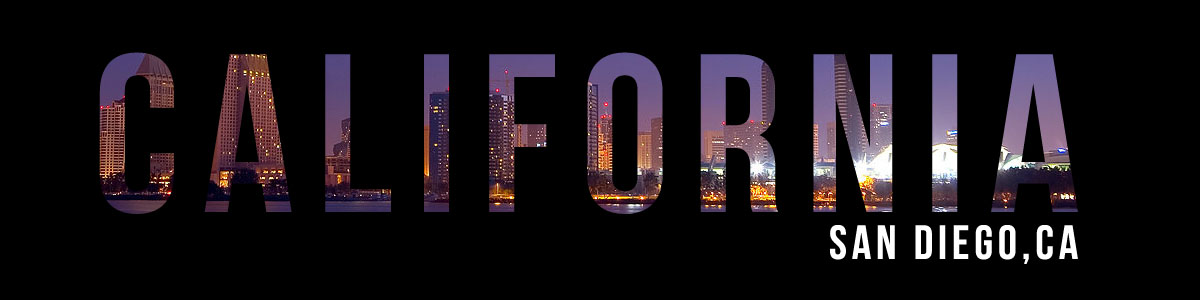

## Overview
In this project, we delve into the intriguing world of real estate price prediction, focusing specifically on the housing market in California. The goal is to develop a machine learning model capable of accurately predicting median house values across various districts in California. This analysis is not only a practical endeavor for potential investors and homeowners but also an excellent opportunity to explore and understand the dynamics of real estate pricing.

## Dataset
The main piece of this analysis is the California Housing dataset, obtained from the scikit-learn library. This dataset is a modified version of a dataset derived from the 1990 U.S. census and contains features such as the average number of rooms per house, median income of households within a block group, and more. The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars. The dataset presents a rich combination of numerical attributes, providing a comprehensive framework for regression analysis.

## Objectives
The primary objective of this project is to:

1. Build and evaluate a regression model that accurately predicts the median housing prices in California districts.
2. Identify key factors that significantly influence housing prices.
3. Explore and apply various data preprocessing techniques, feature engineering methods, and model evaluation metrics to enhance model performance.
    
## Significance
This analysis holds significant value in various domains:

1. Real Estate Analysis: Assisting real estate agencies and investors in understanding housing market trends and making informed decisions.
2. Economic Insights: Offering insights into how different socioeconomic and demographic factors influence housing prices.
3. Data Science Application: Demonstrating a practical application of machine learning techniques in solving real-world problems.

## Methodology
We will follow a structured approach, beginning with exploratory data analysis to understand the dataset's characteristics, followed by preprocessing and feature engineering to prepare the data for modeling. We will then build a linear regression model, evaluate its performance, and iteratively improve it. Then, we will leverage other models like KNN and ensemble models, specifically Random Forest and Gradient Boosting, to test its efficiency in predicting California Housing Prices. 

## Ethical Considerations
Throughout this project, we will also be mindful of ethical considerations in data science, ensuring that our analysis is fair, transparent, and respectful of privacy.

## Phase 1: Data Import and Set Up
In this step, I'll be importing the necessary dataset from the source and setting it up in a Pandas dataframe for easy manipulation and analysis. During this step, we won't be making any alteration to the data. Any kind of data cleanup will show up starting in Phase 2.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.metrics import r2_score
%matplotlib inline

/Users/seanpark/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Next, we will import the data from sklearn.datasets

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)
target = california.target
california_df = california.data

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

### Here in the description, we can see the attributes listed. 
For convenience, I will list them here as well. 

Attribute Information (in order):

        MedInc        median income in block group
        HouseAge      median house age in block group
        AveRooms      average number of rooms per household
        AveBedrms     average number of bedrooms per household
        Population    block group population
        AveOccup      average number of household members
        Latitude      block group latitude
        Longitude     block group longitude


#### Let's set the column names for this data that we imported. We will be setting our target, value that we plan to explain or predict, as the median house value for California districts. This median value is expressed in hundreds of thousands of dollars ($100,000). 

In [3]:
# Labeling the column names to match the attribute information provided above.
col_labels = ['MedInc','HouseAge','AvgRooms','AvgBedrms','Population','AvgOccup','Latitude','Longitude']

# Assigning the attributes to each column to create a dataframe. 
df = pd.DataFrame(california_df, columns=col_labels)

# Setting the Median value as the target value, the value we plan to explain or predict.
df['Med_value'] = target

#### We will review the dataset with the addition of Median value to make sure it is correctly implemented.

In [4]:
df.head()

MedInc  HouseAge  AvgRooms  AvgBedrms  Population  AvgOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Med_value  
0    -122.23      4.526  
1    -122.22      3.585  
2    -122.24      3.521  
3    -122.25      3.413  
4    -122.25      3.422

## Phase 2: Explanatory Data Analysis (EDA) 
### Now that the data is properly loaded, I will begin to explore the dataset first by identifying the total number of non-null rows and the datatypes for each column. 

As shown in the figures below, it is clear that there are no non-null values in these columns since the total number of non-null count matches the total number of rows. This removes to need to perform data cleaning regarding missing data. We will now be moving on to exploring if any columns need to be scaled to create an accurate linear regression model.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AvgRooms    20640 non-null  float64
 3   AvgBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AvgOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Med_value   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


### Let's explore the data and see their values!
This table below show statistical details for each features. Let's explore these figures to track any possible areas to target data cleaning. 

1. First, we notice an issue in AvgOccup. The 75% is 3.2822, but the maximum value is 1243.333. This means that the maximum value could be an outlier or a data error. The large standard deviation in comparison to other features can be due to the existence of large figures like 1243.3333.
2. We notice a similar issue with AvgRooms. There is a large discrepancy between 75% value and the maximum value, which signals the existence of an outlier. 
3. These figures like mean and std and min for latitude and longitude don't provide significant detail regarding the data. Since they are locational, they have significant meaning in context. Later, we will find ways to formulate these two columns to get more meaningful information. 

In [6]:
df.describe()

MedInc      HouseAge      AvgRooms     AvgBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AvgOccup      Latitude     Longitude     Med_value  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.540000   -124.350000      0.149990  
25%        2.429741     33.930000   -121.800000      1.196000  
50%        2.818116     34.260000   -118.490000      1.797000  
75%        3.282261     37.710000   -118.010000      2.647250  
max     1243.333333     41.950000   -114.310000      5.000010

### Below, we have a histogram of the features to show their distribution. Based on these plots, we can observe several important details for various columns.

1. There are several columns that show right skew, meaning that they have long tails that are not near the feature average. These features include MedInc, AvgRooms, AvgBedrms, Population, and AvgOccup. 
2. HouseAge and Median histograms also show interesting details. We notice a high spike at their maximum value for both. This could be because of several factors. First, it could be the case that the maximum values are real. Second, this could present data error like misrecorded data. Lastly and most likely, the maximum value could have been capped for these two features (i.e any houses older than 52 years are marked as 52 years old). 
3. Lastly, we notice that HouseAge, Latitude and Longitude are bimodal, signaling further exploration in their distribution. 

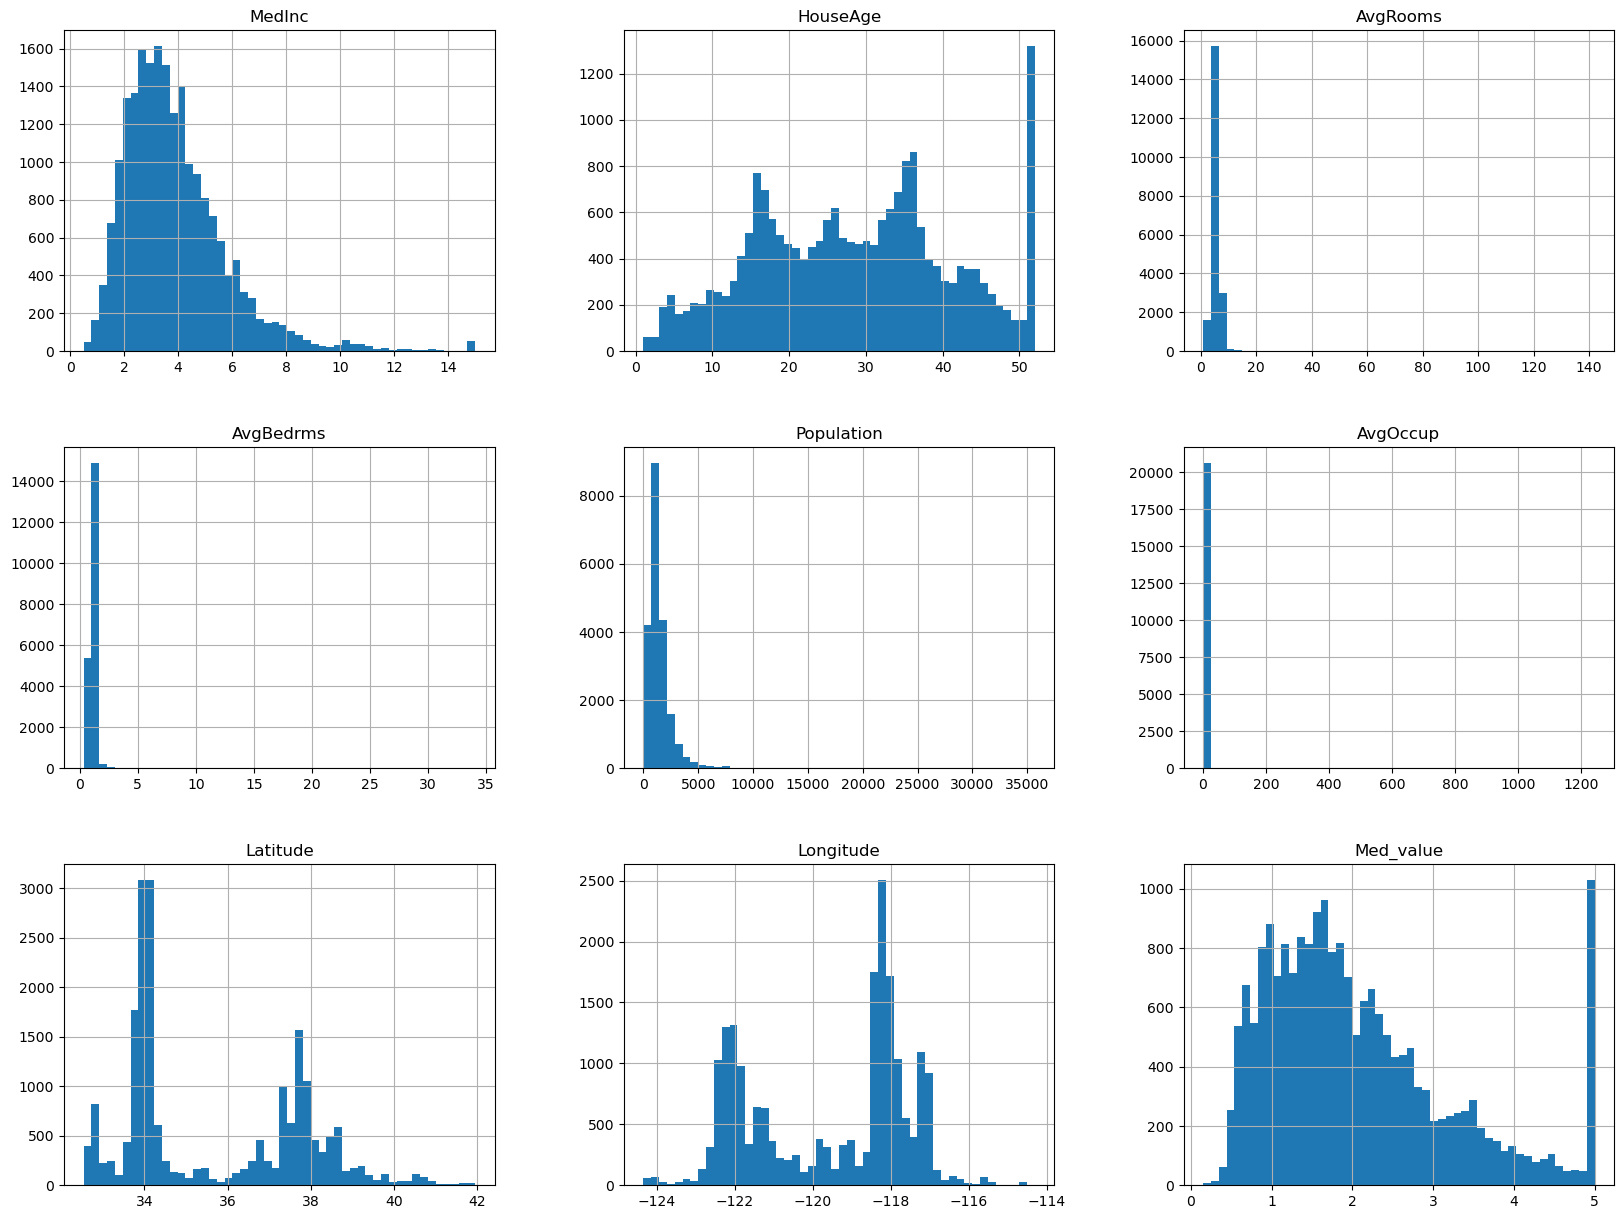

In [7]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

### Let's explore the longitude and latitude

Just as they stand, longitude and latitude don't provide too much insights as numerical figures. However, these data points mapped out present new insights into our analysis. 

Below, we see a scatterplot of longitude vs latitude color coded with Median, which is our target variable. Surprisingly enough, this scatter plot actually drew a map of California. Looking at this data, we can confirm couple ideas. 
1. First, the houses on the coast are more expensive than those that are in land. 
2. In addition, the size of the individual dots represent the population density. From this figure below, we can also note that housing median value in more concentrated areas are higher. 
3. Latly, we notice that there are outliers in Median home values and ocean proximity and population density are not definitive features for house value.

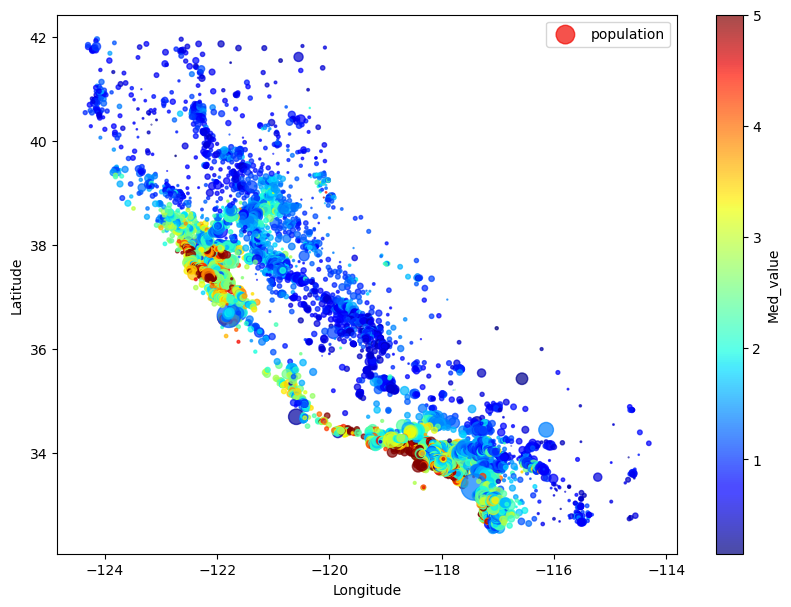

In [8]:
df.plot(kind="scatter", x="Longitude",y="Latitude", c="Med_value", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10,7), s=df['Population']/100, label="population", alpha=0.7)
plt.show()

### Let's take a look at the boxplots to identify which plots have significant outliers, so we can clean the data further.

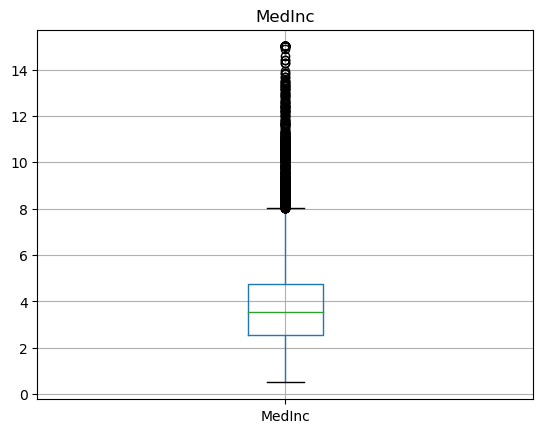

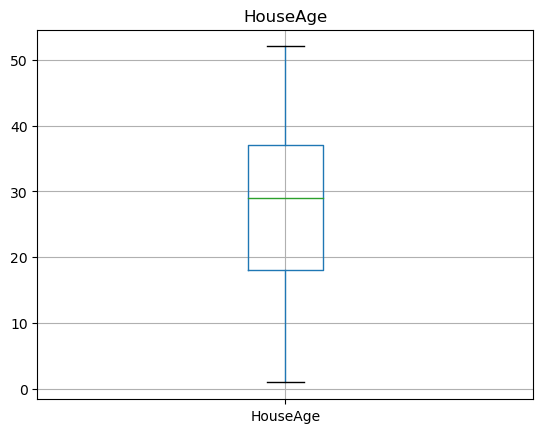

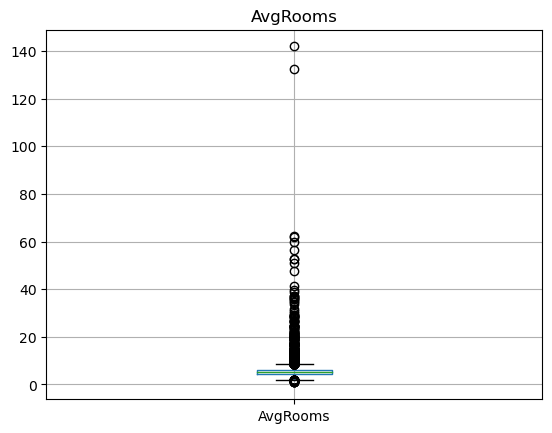

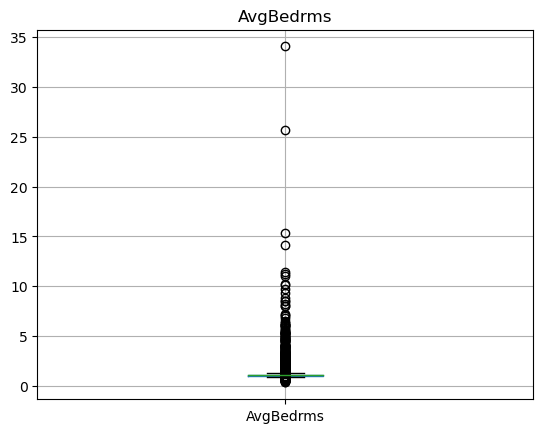

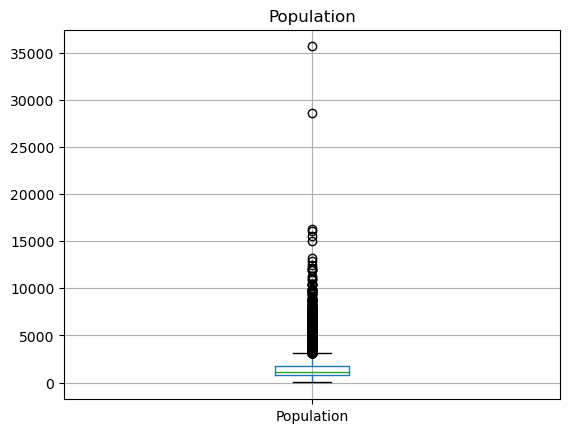

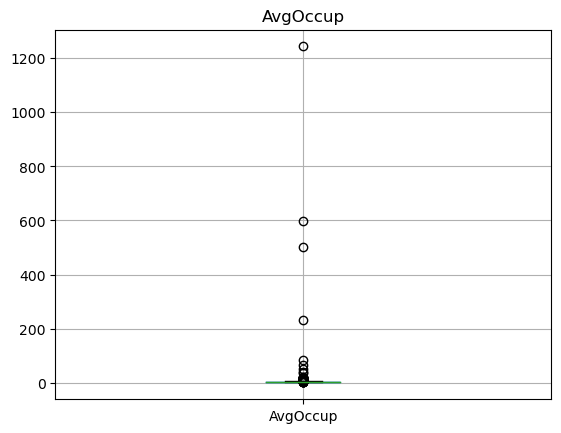

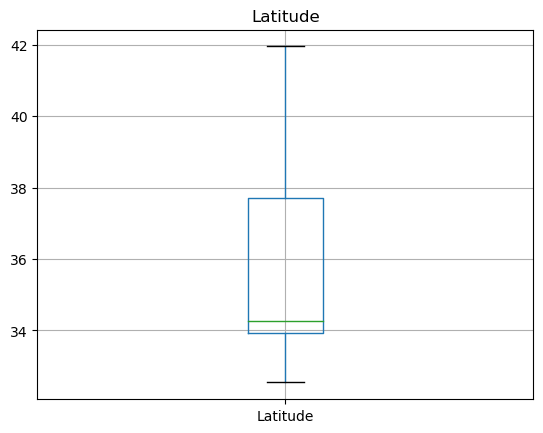

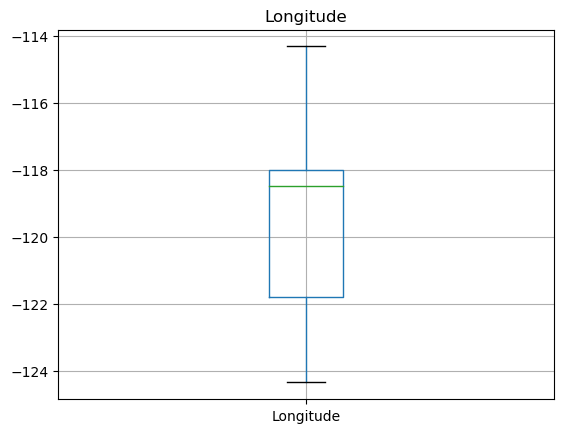

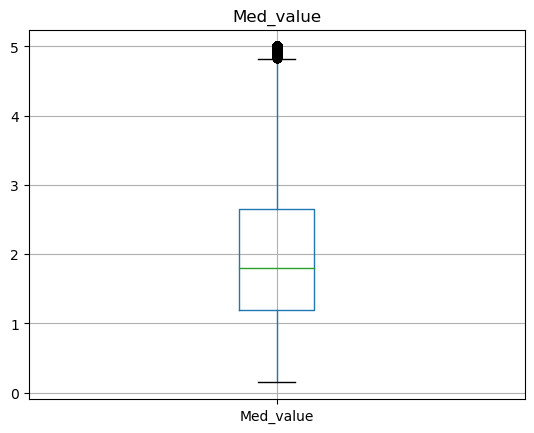

In [9]:
for column in df.columns:
    plt.figure()  
    df.boxplot([column])
    plt.title(column)
    plt.show()

#### We will be examining the correlation of each columns to each other and also the target variable, median. By doing so, we will be able to identify and columns that may be inefficient in predicting the target variable. In addition, this process may shed more light on multicolinearity, which may produce redundancy in the model.

1. From immediate oberservations, we can tell that MedInc has the highest correlation to Median, which indicates that it will be highly useful in predicting Median. 
2. In addition, we notice high correlation between AvgRooms and AvgBedrms, which presents a case for multicolinearity. Multincolinearity is problematic for several reasons. Mainly, it makes the model unreliable because it makes it difficult to understand which factor is influencing the outcome. In addition, multicolinearity may cause overfitting, in which the future datasets may produce inaccurate predictions. Because it's not totally clear if there's multicolinearity, we will explore this using **Variance Inflation Factor (VIF)**.

/Users/seanpark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seanpark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seanpark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/seanpark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

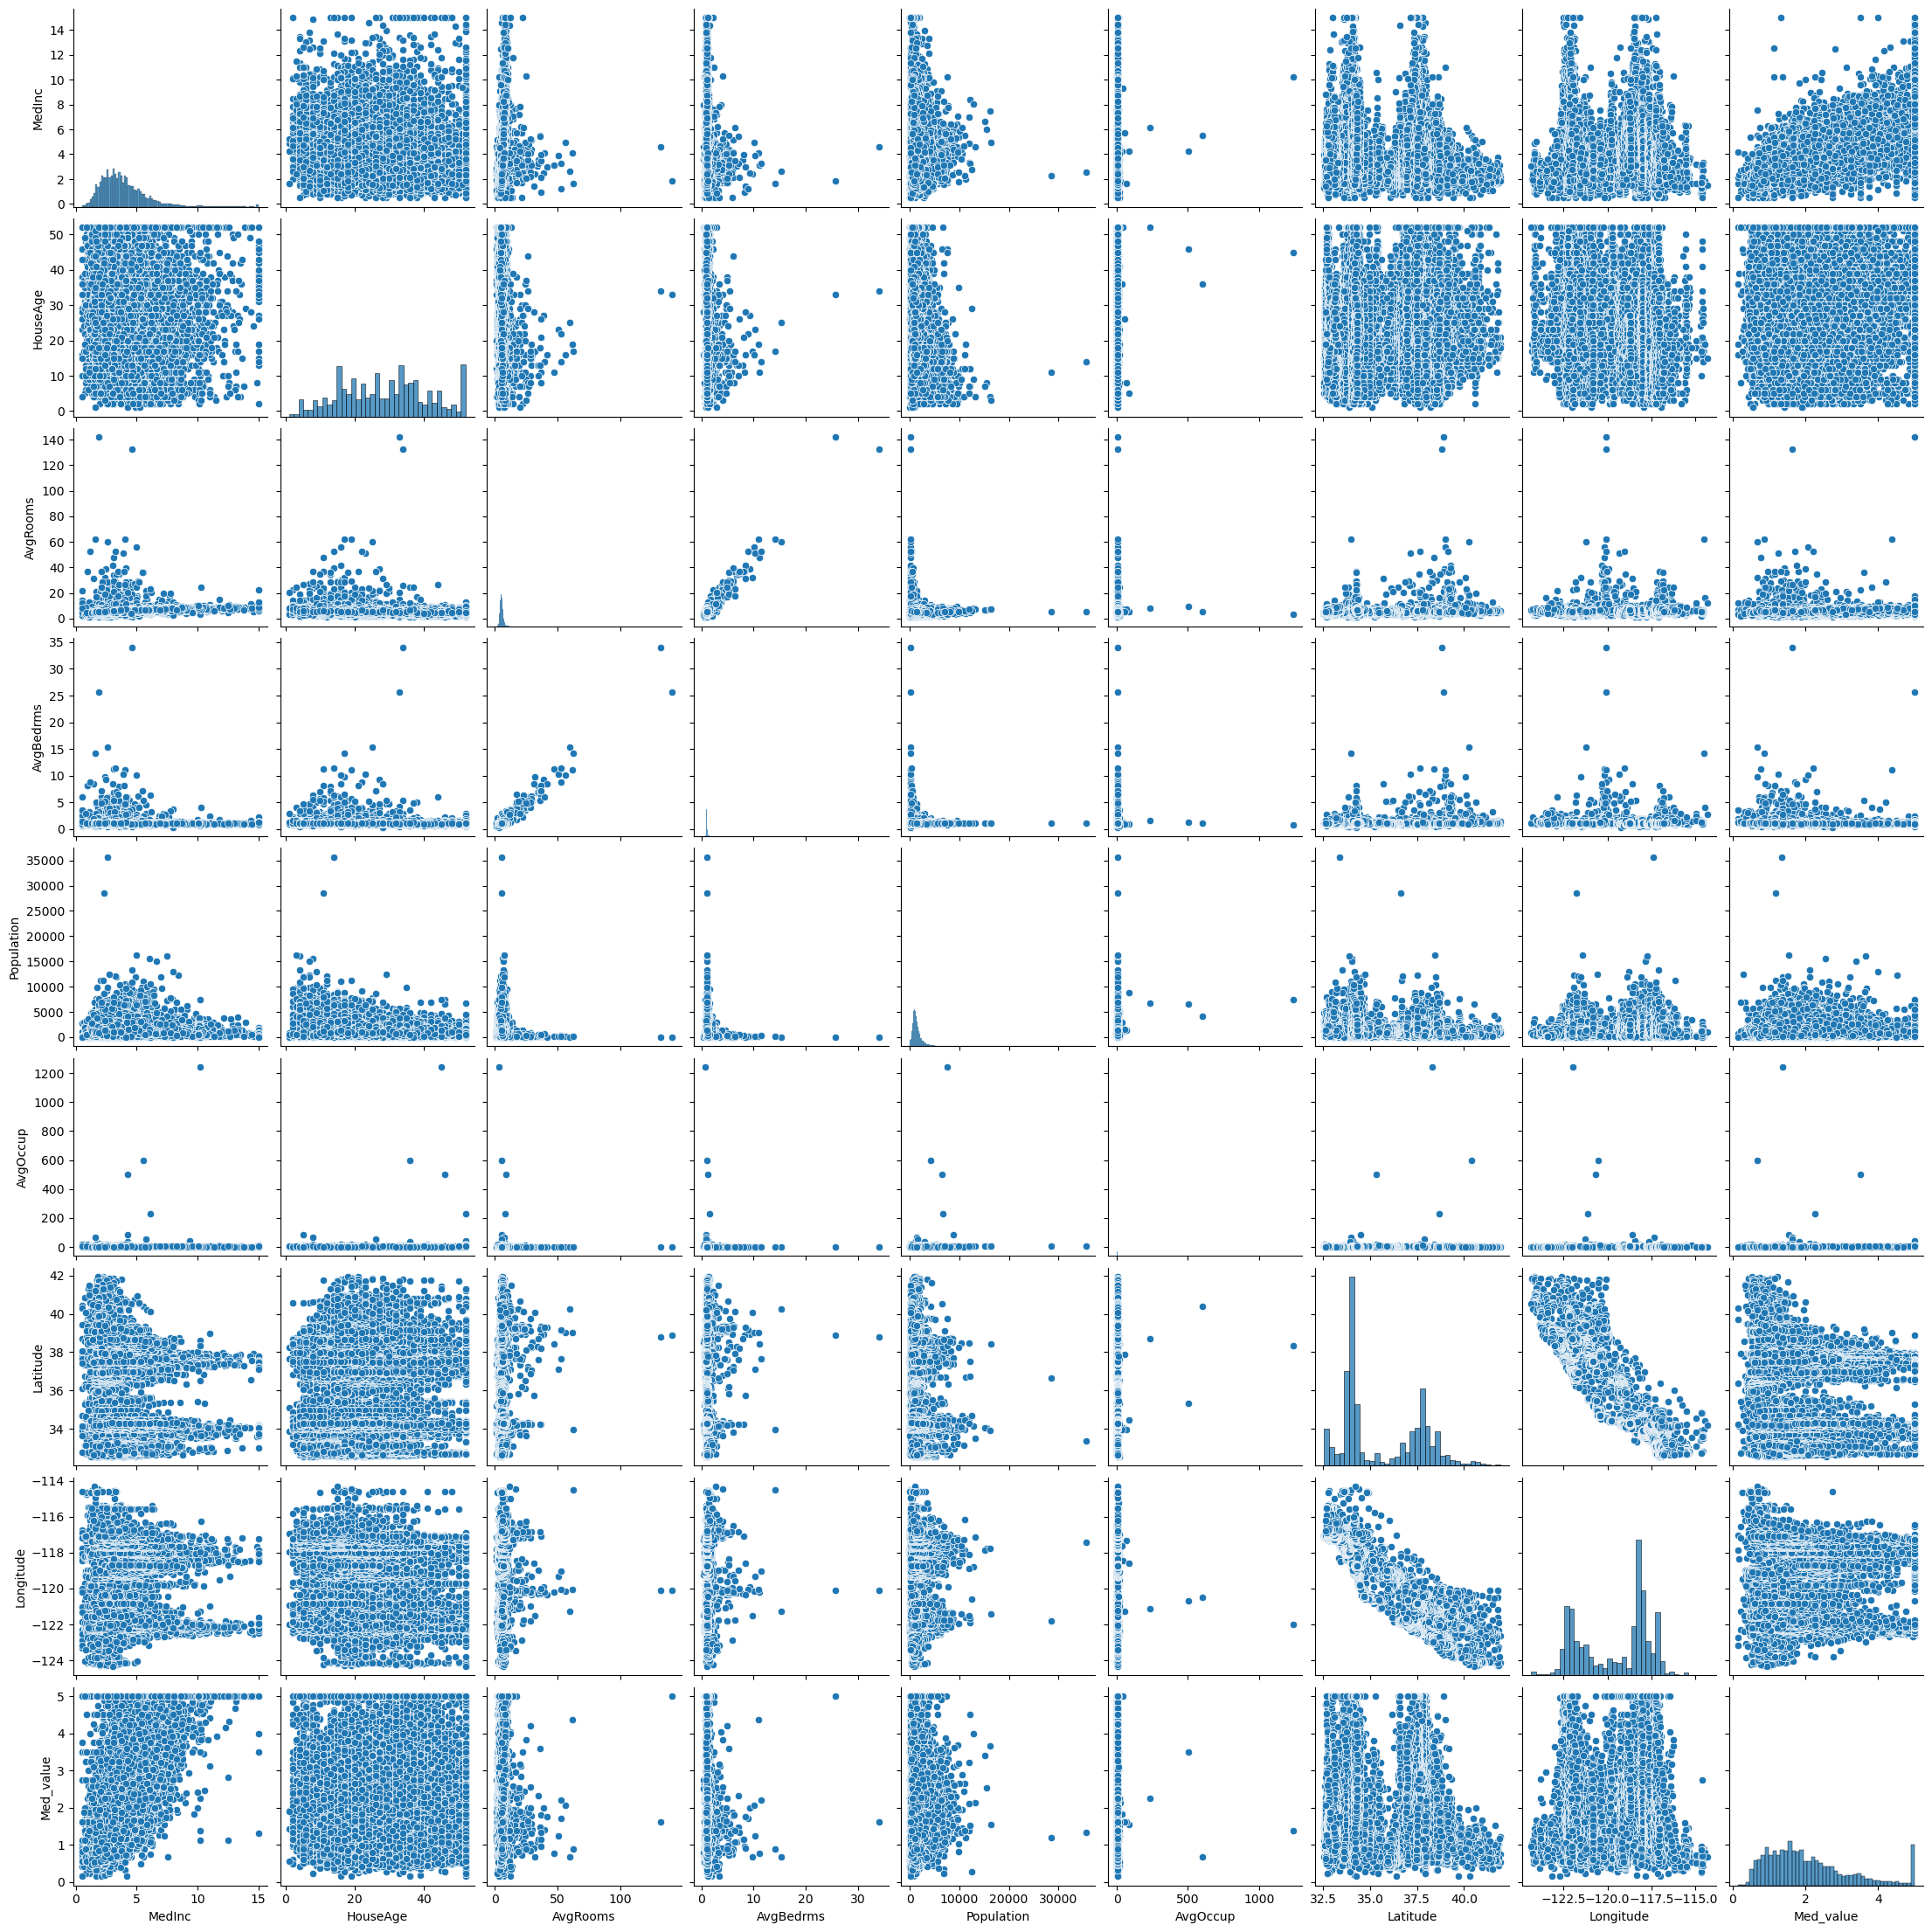

In [10]:
sns.pairplot(df)

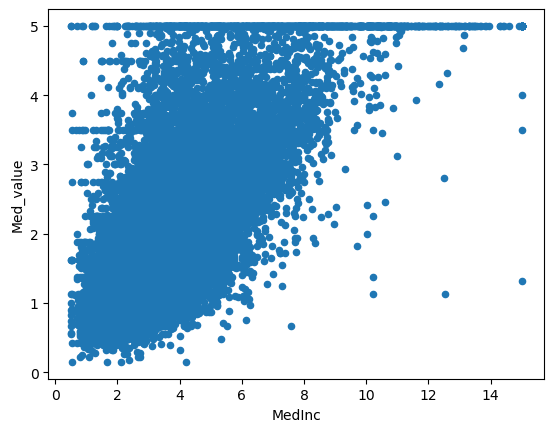

In [11]:
df.plot(kind="scatter", x="MedInc",y="Med_value")
plt.show()

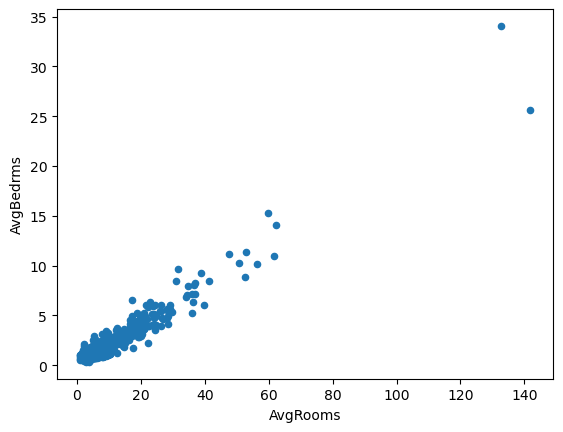

In [12]:
df.plot(kind="scatter", x="AvgRooms",y="AvgBedrms")
plt.show()

### Checking the correlation matrix and also the heatmap... 

We have confirmed our intuition that the AvgRooms and AvgBedrms have a high positive correlation of 0.848. We have also confirmed that MedInc also has a positive correlation with Med_value, indicating that MedIn will be an important feature in predicting Med_value. 

In [13]:
df.corr()

MedInc  HouseAge  AvgRooms  AvgBedrms  Population  AvgOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AvgRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AvgBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AvgOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
Med_value   0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude  Med_value  
MedInc     -0.079809  -0.015176   0.688075  
HouseAge    0.011173  -0.108197   0.105623  
AvgRooms    0.106389  -0.027540   0.151948  
AvgBedrms   0.069721   0.013344  -0.046701  
Population -0.108785   0.099773  -0.024650  
AvgOccup    0.002366   0.002476  -0.023737  
Latitude    1.000000  -0.924664  -0.144160  
Longitude  -0.924664   1.000000  -0.045967  
Med_value  -0.144160  -0.045967   1.000000

<Axes: >

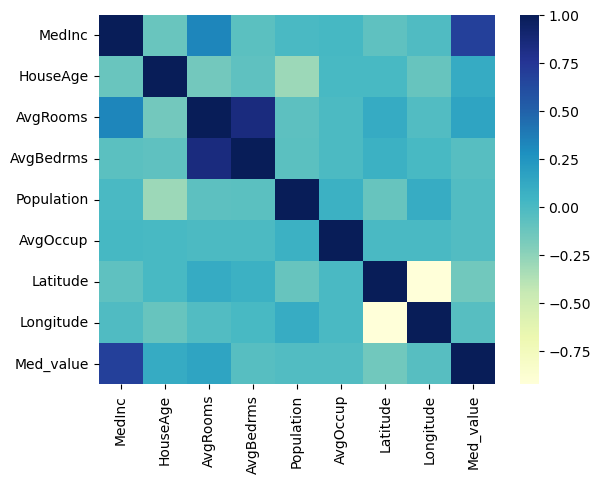

In [14]:
sns.heatmap(df.corr(), cmap="YlGnBu")

### To assess whether we need to address the high correlation for possible Multicolinearity, let's take a look at the Variance Inflation Factor (VIF).

**The following is how we will assess the scores**

1. A VIF score <5 presents no risk of multicolinearity. 
2. VIF score of >5 and <10 is a grey area, and presents some risk of multicolinearity. 
3. VIF score of >10 presents a strong case of multicolinearity.



In [15]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = add_constant(df)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

      Feature           VIF
0       const  19685.429049
1      MedInc      3.813979
2    HouseAge      1.268150
3    AvgRooms      8.477254
4   AvgBedrms      7.173226
5  Population      1.138164
6    AvgOccup      1.011274
7    Latitude     10.842087
8   Longitude     10.407641
9   Med_value      2.539571


### Model Selection

Before we go into feature engineering based on some data related concerns that we found, we need to select the model. Based on which model we select, we will need to perform different transformations in the data to fit within its requirements. <u> **My goal in this project is to leverage various different models to find a model that works best in terms of different statistics like R^2, MAE, MSE, and RMSE.**</u> Here are the following models that I plan on evaluating and the necessary data requirements for each. Organizing this will help prepare for data prior to Training. 
    
1. **Linear Regression** 
    <br> * Assumes a linear relationship between features and the target variable.
    <br> * Requires features to be normally distributed; sensitive to outliers.
    <br> * Does not handle multicollinearity well.
2. **K Nearest Neighbors Regression**
    <br> * Non-parametric and instance-based.
    <br> * Sensitive to the scale of the data; features need to be standardized.
    <br> * Works well with smaller datasets but can be inefficient with large datasets.
3. **Random Forest Regression**
    <br> * Ensemble of Decision Trees; more robust than a single Decision Tree.
    <br> * Handles non-linear data well and is robust to outliers.
    <br> * Not sensitive to feature scaling.
4. **Gradient Boosting Regression**
    <br> * Builds trees one at a time, where each new tree corrects errors made by previously trained trees.
    <br> * Can capture complex patterns in the data.
    <br> * May require careful tuning of parameters and is sensitive to overfitting.

## Phase 4: Linear Regression 

### Phase 4.a Training and Testing

### Let's import the necessary libraries to train our model.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### Here, we are going to train the data with a 70/30 train/test split. 

In [17]:
X = df.drop('Med_value', axis=1)
y = df['Med_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

### We will then use the LinearRegression model from sklearn to train our training set.

In [18]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
print(lm.intercept_)

-36.40816857602342


In [20]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficient'])
coeff_df

Coefficient
MedInc         0.439271
HouseAge       0.008845
AvgRooms      -0.115965
AvgBedrms      0.630250
Population    -0.000007
AvgOccup      -0.007268
Latitude      -0.418054
Longitude     -0.429767

### Phase 4.b Linear Regression Model Diagnostics
In this section, we will be exploring the model and it's outputs to see further changes we need to make on the data or the model itself to bring improvements. 

### **Mean absolute error**, **mean squared error**, and **root mean square error** are all metrics that measure the accuracy of the machine learning model. 
1. **Mean absolute error** refers to the measure of errors between y_test and the prediction value. 
2. **Mean squared error** refers to how close a regression line is from y_test and squaring that value. This is an effective metric because it gives more weight to larger differences unlike mean absolute error.
3. **Root mean square error** is square root of mean squared error. Mean squared error presents itself as square of the target variable. Root mean square error is meansured in the same units, making Root mean square error easier to interpret, while still penalizing the larger differences. 

### Here is the interpretation of the figures below. 

MAE (Mean Absolute Error) of 0.532: The average absolute error in the model's predictions is approximately 0.532, which means the model's predictions are off by an average of $53,200 from the actual housing prices (since the target variable is measured in $100,000 increments). This figure indicates the typical error magnitude you can expect from the model's predictions.

<br> MSE (Mean Squared Error) of 0.536: This metric indicates the average squared deviation of the model's predictions is 0.536. When interpreted in the context of housing prices, this suggests that, before adjusting for the scale of the data, the average squared error is approximately $53,600^2. The squaring of errors means this metric is more sensitive to larger deviations from the actual values.

<br> RMSE (Root Mean Squared Error) of 0.732: By taking the square root of the MSE, we get an RMSE of 0.732, translating to an average prediction error of about $73,200. The RMSE is higher than the MAE, which may point to the presence of some larger errors in the model's predictions. This is a crucial insight, as it implies that while the model may often be quite accurate, there are instances where it is significantly off.

<br> R-squared of 0.598: This coefficient of determination suggests that approximately 59.8% of the variation in California housing prices can be explained by the linear regression model. An R-squared value below 0.6 indicates that, although the model captures a significant portion of the housing price variance, there remains room for improvement. There are other factors influencing housing prices that the model hasn't captured.

#### Contextual Interpretation
<br> The MAE and RMSE provide two different perspectives on the average error; the RMSE value is notably larger than the MAE, indicating that there are several instances where the model is quite off-target. This disparity often suggests that while the model may be accurate in many cases, there are occasional predictions with large errors that could be crucial, depending on the stakeholder's needs.

<br> The R-squared value reveals that our linear model has a moderate fit. It captures some of the variability in housing prices but doesn't account for a significant portion of it. This could be due to the model's simplicity or the omission of important predictors not captured by the linear regression.

<br> Overall, while the model provides a baseline understanding of housing prices, stakeholders should consider additional factors or more complex models to increase predictive accuracy and account for the remaining unexplained variance in housing prices.

In [21]:
print('MAE:', metrics.mean_absolute_error(y_test, lm.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lm.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm.predict(X_test))))
print("R-squared:", r2_score(y_test, lm.predict(X_test)))

MAE: 0.5321456389199501
MSE: 0.5360913955830068
RMSE: 0.7321826244749371
R-squared: 0.5978816304623098


### This plot shows our test values outputted from our model in comparison with the actual test values. There are several positive signs and concerns with this graph. 
1. We first see that it is trending in the right direction; however, the cloudiness or how wide the trend appears means that there are errors in the predictions that is affecting its accuracy. There is a positive correlation, which is a good sign. 
2. Secondly, we notice the vertical grouping of points on the right side suggests there are a number of different actual values for which the model predicted similar high values. This could indicate a saturation effect or a range beyond which the model cannot differentiate between actual values well.
3. The red line marks the ideal line for the model. 

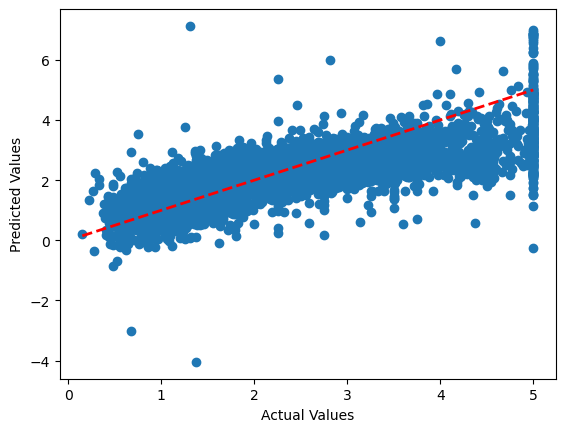

In [22]:
predictions = lm.predict(X_test)
residuals = y_test - predictions

plt.scatter(y_test, predictions)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

### Residual Analysis
This analysis is to test the normality of residuals (y_test-predictions). Normally distributed residuals suggest that the model is appropriate for the data. If the residuals are not normally distributed, this could indicate that some relationships between the variables have not been captured by the model, suggesting the need for additional predictors, interaction terms, or non-linear transformations. The distribution looks approximately normal; however, we will look at more visuals to assess the model's performance

/Users/seanpark/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


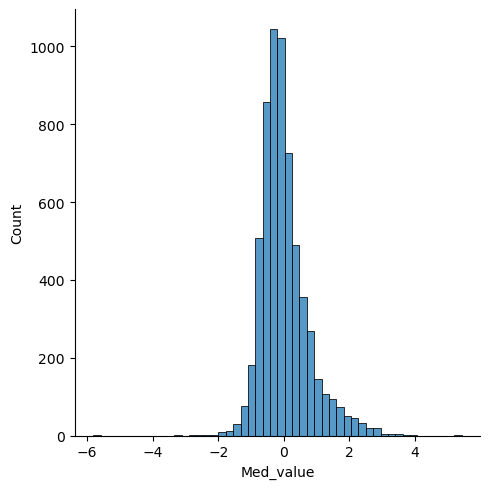

In [23]:
sns.displot((residuals),bins=50)

### Residuals vs. Fitted Values

This visual is mainly to test the homoscadasticity of the residuals. In a well functioning model, the residuals are scattered around the red line without a clear pattern. Homoscadasticity ensures that the predictions of linear regression are reliable and inefficient. However, in the visual below, we see a cone like shape, which signifies the inconsistent variance of the residuals. 

Heteroscedasticity can lead to inefficient estimates and can affect the hypothesis tests for the regression coefficients, making them unreliable. It suggests that the model may not be the best representation of the data and that there may be omitted variables, incorrect functional forms, or that a transformation of the response variable or the addition of a variance-stabilizing feature might be required.

To address this, we can attempt to transform some features to adjust the right skew and address the outliers for this linear regression model. 

**Important to note**: This is exactly why I want to leverage various models for this problem. First, some models like linear regression require transformation of features to create an accurate model. However, the main downfall of doing so is in the interpretation. Because these features have gone through transformation, it may be difficult to interpret the result. 

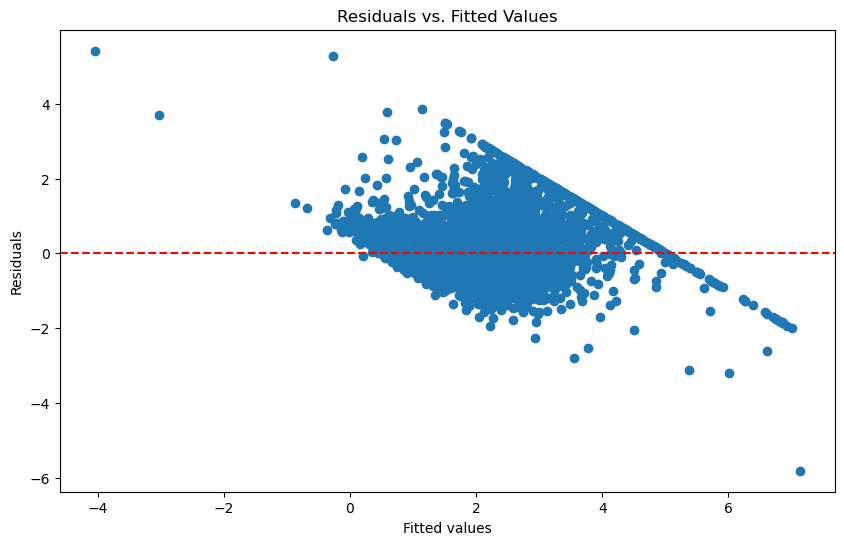

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

### Q-Q Plot

The Q-Q plot is used to check the normality of residuals by plotting their distribution against a theoretical normal distribution. A good alignment with the red line indicates that the residuals are normally distributed.

The points in the Q-Q plot deviate significantly from the red line, especially at the ends of the distribution. This suggests that the residuals are not normally distributed and that there are outliers or extreme values, as indicated by the points that stray from the line at both ends of the plot.

To address this, we can attempt to transform some features to adjust the right skew and address the outliers for this linear regression model. 

<Figure size 1000x600 with 0 Axes>

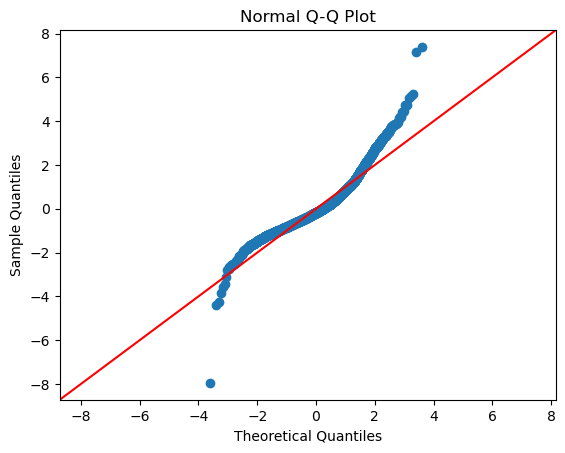

In [25]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

### Scale-Location Plot

Ideally, the plot should show a random scatter of points that does not form a particular pattern. The spread of the residuals should be roughly the same across all levels of fitted values.

The plot shows a clear pattern where the spread of the residuals increases with the fitted values. This is an indication of heteroscedasticity. The residuals are smaller for lower fitted values and larger for higher fitted values, which suggests that the error variance changes with the level of the predictor, violating the assumption of homoscedasticity.

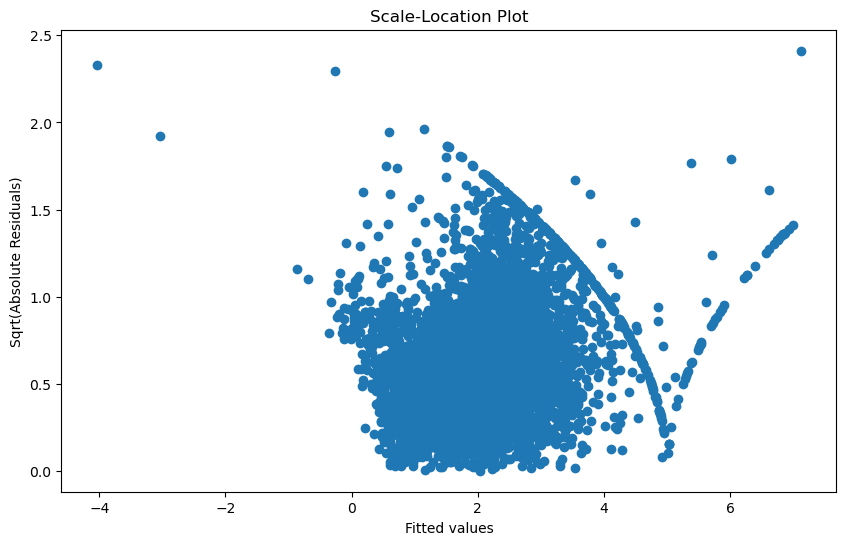

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions, np.sqrt(np.abs(residuals)))
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(Absolute Residuals)')
plt.title('Scale-Location Plot')
plt.show()

### Revisiting the distribution plots

Let's revisit the distribution plot to see which features to transform to fix the heteroscadasticity. 

As noted, we want to address the heteroscadasticity of the residuals, so let's log transform AvgOccup and Population. 

Also remember from before that there was high correlation between AvgBedrms and AvgRooms. Both of these features also had a VIF of >8. We will address this by creating a feature called BedPerRooms which is the ratio of Bedrooms to Total Rooms. By doing so, we'll be able to eliminate any multicolinearity in the data. 

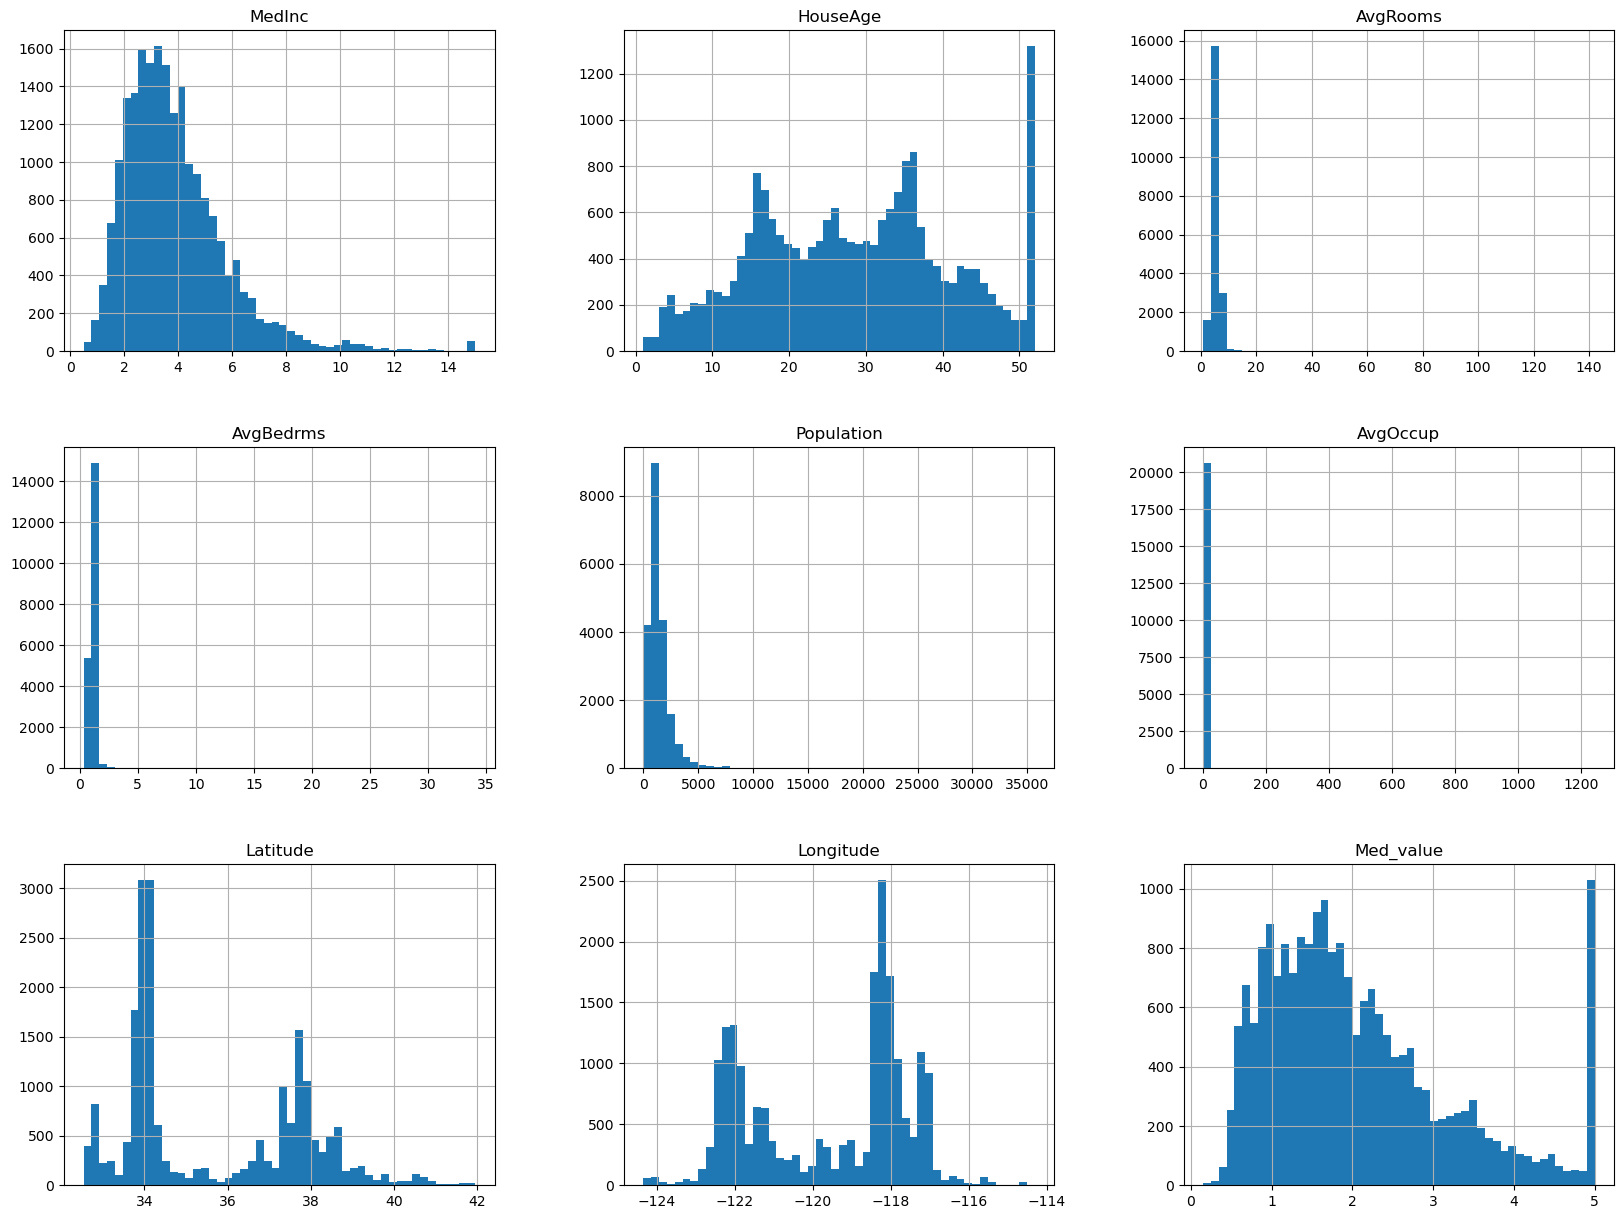

In [27]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [28]:
df_v2 = df
df_v2['Log_Population'] = np.log(df_v2['Population'])
df_v2['Log_AvgOccup'] = np.log(df_v2['AvgOccup'])

df_v2['BedPerRms'] = df_v2['AvgBedrms']/df_v2['AvgRooms']

df_v2 = df_v2.drop(['AvgBedrms', 'AvgRooms','AvgOccup','Population'], axis=1)

### After transformation

Notice that the distribution of Log_Population, Log_AvgOccup, and BedPerRms have adjusted their skew with the log transformation and the feature engineering. There are still issues in other features like Latitude and Longitude. However, as noted before, the nonlinear distribution of features suggests the lack of efficiency for linear regression. We may have to use other models that is more appropriate for the data. 

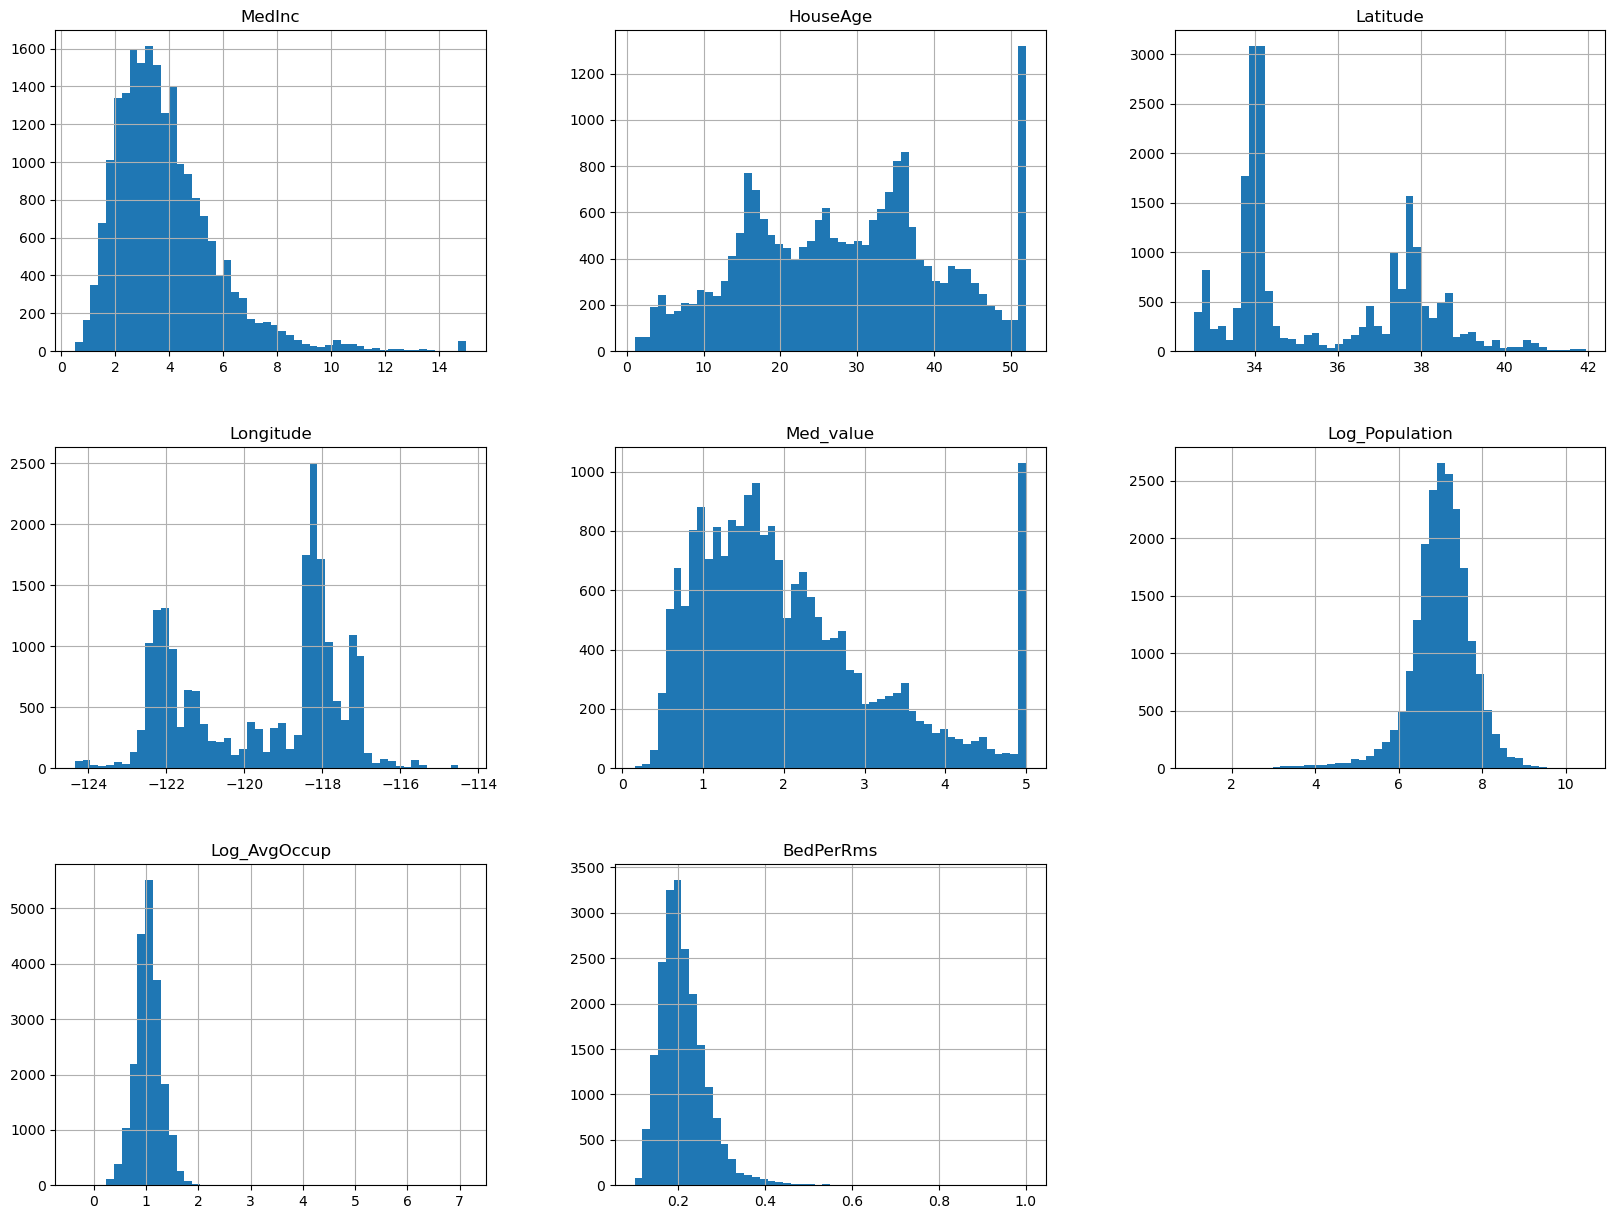

In [29]:
df_v2.hist(bins=50, figsize=(20, 15))
plt.show()

### VIF Check to see new BedPerRms feature

As shown below, the new feature BedPerRms has a very low VIF score, which means theres no worries about multicolinearity with the previous features. However, there is still a high score for Latitude and Longitude. However, Latitude and Longitude create contextual meaning, so it may be ineffective to try to address the multicolinearity there. 

In [30]:
X = add_constant(df_v2)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

          Feature           VIF
0           const  18342.747623
1          MedInc      3.416560
2        HouseAge      1.244030
3        Latitude     10.447643
4       Longitude      9.943284
5       Med_value      2.948031
6  Log_Population      1.154613
7    Log_AvgOccup      1.240783
8       BedPerRms      1.860264


In [31]:
X_v2 = df_v2.drop('Med_value', axis=1)
y_v2 = df_v2['Med_value']

X_train, X_test, y_train, y_test = train_test_split(X_v2, y_v2, test_size = 0.3)
lm_v2 = LinearRegression()
lm_v2.fit(X_train, y_train)

LinearRegression()

### Here is the interpretation of the figures below (Linear Regression V2). 
MAE (Mean Absolute Error) of 0.489: The model has an average error of $48,864 when predicting housing prices. This value, lower than in our previous model, suggests increased precision in our predictions.

MSE (Mean Squared Error) of 0.448: The model's predictions, on average, show a squared error of $44,778. This squared term emphasizes larger errors more than smaller ones, meaning this reduction from the previous model indicates fewer large errors.

RMSE (Root Mean Squared Error) of 0.669: The RMSE, which translates to $66,916, provides an average error magnitude in the same units as the housing prices. This is a decrease from the previous model, indicating that on average, the prediction errors are smaller.

R-squared of 0.662: Approximately 66.2 percent of the variance in housing prices is now explained by our model. This is a significant improvement, reflecting that the model fits the data better than before and utilizes the predictive features more effectively.

#### Interpretation in Context
With the refined model, we see a decrease in both MAE and RMSE, suggesting that the changes implemented have led to more accurate predictions across the board. Notably, the RMSE has decreased more than the MAE, indicating that we have successfully mitigated some of the larger errors that were previously inflating our predictions.

The increase in R-squared value is particularly encouraging. It shows a stronger relationship between our features and housing prices, explaining more variability in the data. This improvement suggests that we are now capturing more of the nuances and trends in the housing market.

In summary, the modifications made to our linear regression model have yielded a more reliable tool for estimating housing prices. Stakeholders can have greater confidence in its predictions, which now capture a larger share of the factors influencing property values. This model serves as a more robust baseline for understanding and analyzing the California housing market.

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, lm_v2.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lm_v2.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_v2.predict(X_test))))
print("R-squared:", r2_score(y_test, lm_v2.predict(X_test)))

MAE: 0.4886448627946955
MSE: 0.4477809383837014
RMSE: 0.6691643582735869
R-squared: 0.6623965870058988


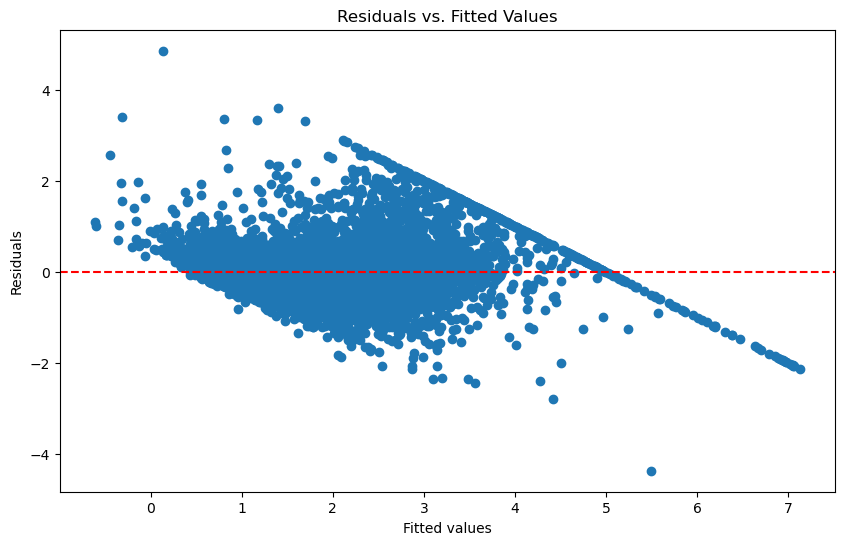

In [33]:
predictions_v2 = lm_v2.predict(X_test)
residuals_v2 = y_test - predictions_v2

plt.figure(figsize=(10, 6))
plt.scatter(predictions_v2, residuals_v2)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()

<Figure size 1000x600 with 0 Axes>

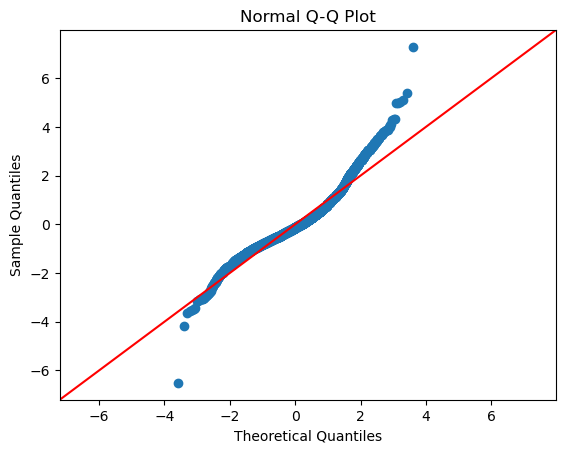

In [34]:
plt.figure(figsize=(10, 6))
sm.qqplot(residuals_v2, line='45', fit=True)
plt.title('Normal Q-Q Plot')
plt.show()

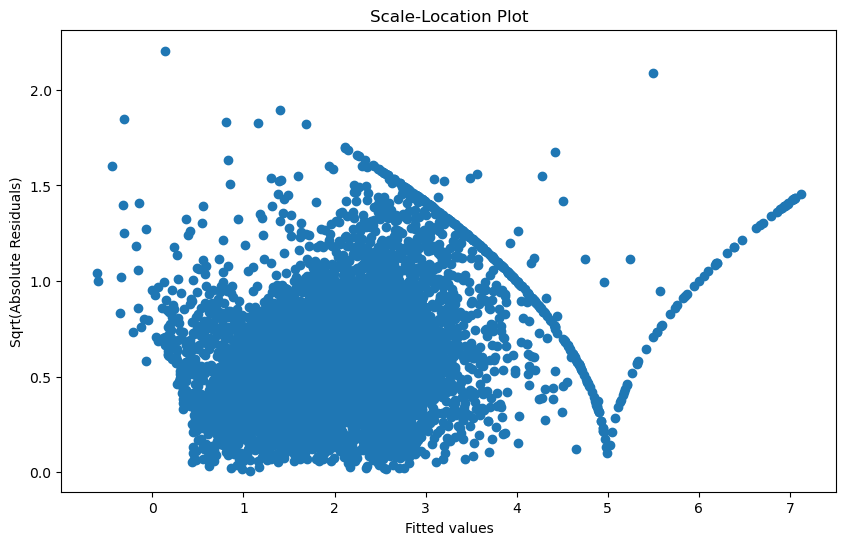

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions_v2, np.sqrt(np.abs(residuals_v2)))
plt.xlabel('Fitted values')
plt.ylabel('Sqrt(Absolute Residuals)')
plt.title('Scale-Location Plot')
plt.show()

### Conclusion to Linear Regression

After the transformations and adjustments to the features, we saw an improvement across all measures of MAE, MSE, RMSE, and R-Squared values. However, looking at the plots, there are still a lot of issues with the data that may cause concerns like the heteroscadasticity. Though we can continue the improvement using more transformations, this will negatively impact the interpretability of the model. These requirements behind Linear Regression are what often causes the shortcomings of the model. However, we can take a look at other models that can efficiently handle nonlinear data like the Latitude and Longitude. We will be trying KNN Regression, Random Forest Regression, and Gradient Boosting Regression. Upon finding the best method, we will be using that method as the main model for predicting median home values. 

## Phase 5: K Neighbors (KNN) Regression

Here we will be using the K Neighbhors Regressor. While Linear Regression offers the advantage of interpretability (the relationship between features and the target is explicitly modeled and quantified), KNN offers greater flexibility in modeling complex relationships.KNN is a non-parametric method, meaning it doesn't assume a specific form for the relationship between features and the target variable. It predicts the target value for a new point based on the 'k' nearest neighbors' target values.

First, we will find the best K using cross validation. We will be finding the best K using two separate metrics: MAE and RMSE. If it's different, we will analyze why it's different and choose the best K. 

In [36]:
df_dt = pd.DataFrame(california_df, columns=col_labels)
df_dt['Med_value'] = target

X = df_dt.drop('Med_value', axis=1)
y = df_dt['Med_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


k_values = range(1, 21)

average_rmse = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores).mean()
    
    average_rmse.append(cv_rmse)

best_k = k_values[np.argmin(average_rmse)]
print(f'Best number of neighbors: {best_k}')

Best number of neighbors: 7


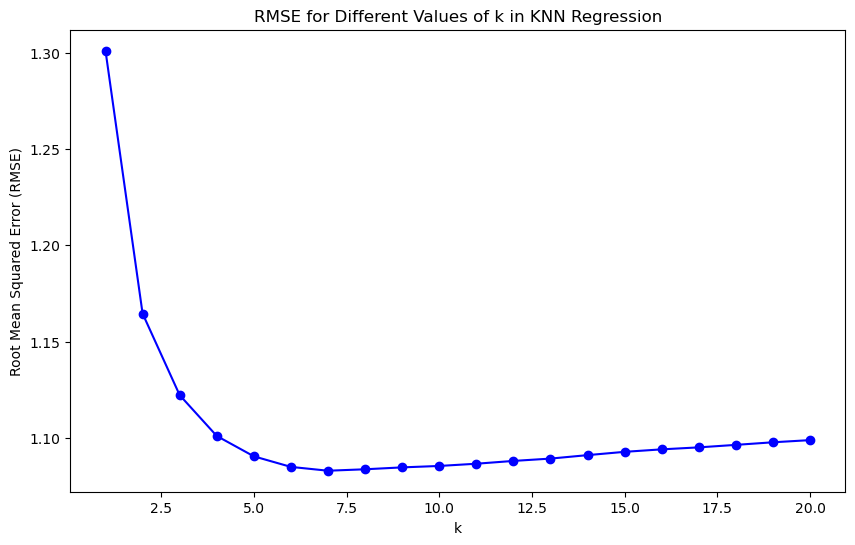

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_rmse, marker='o', linestyle='-', color='blue')
plt.xlabel('k')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE for Different Values of k in KNN Regression')
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


k_values = range(1, 21)

average_mae = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
    cv_mae = np.sqrt(-cv_scores).mean()
    
    average_mae.append(cv_mae)

best_k = k_values[np.argmin(average_mae)]
print(f'Best number of neighbors: {best_k}')

Best number of neighbors: 7


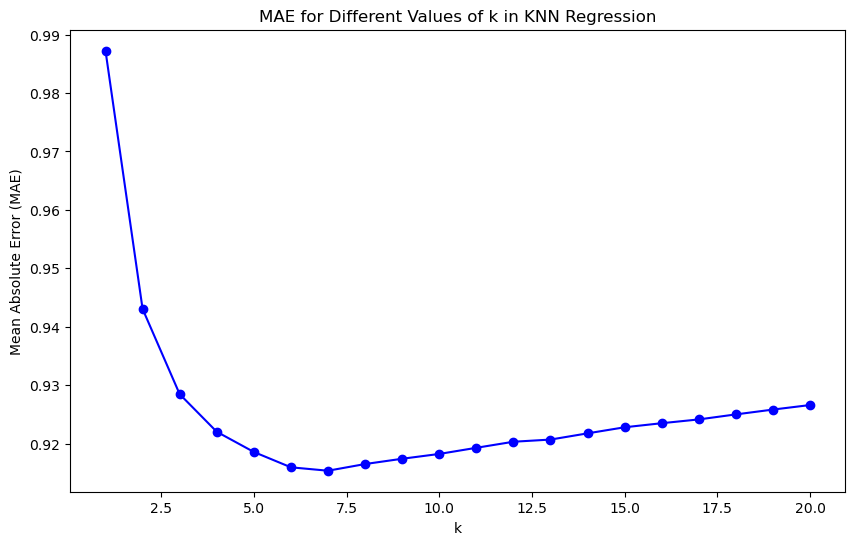

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, average_mae, marker='o', linestyle='-', color='blue')
plt.xlabel('k')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Different Values of k in KNN Regression')
plt.show()

### Finding Optimal K

Cross-validation using RMSE showed the best K was 9, and the one using MAE showed 7 as the best K. RMSE is more sensitive to large errors because it squares the errors before averaging them. If RMSE suggests a higher k, it might indicate that using fewer neighbors (lower k) leads to some predictions with significantly large errors. A higher k smooths out these predictions by considering more neighbors, thus reducing the impact of any single outlier or anomalous point.

**Lower k**: More sensitive to local variations, potentially capturing more detail but at the risk of overfitting and being influenced by outliers.
<br>**Higher k**: Smoother, more generalized predictions that are less sensitive to noise but might miss some subtleties in the data.

This highlights the Bias Variance trade-off often shown in machine learning. We will be using the K to avoid overfitting the data, which may show favorable metrics.

MAE (Mean Absolute Error) of 0.820: This indicates that, on average, the model's predictions are approximately $82,037 away from the actual home values. This level of error is relatively high compared to the more accurate models we've assessed.

MSE (Mean Squared Error) of 1.114: The average of the squared differences between the predicted and actual values is $111,416, which, after taking the square root, points to some large errors in predictions.

RMSE (Root Mean Squared Error) of 1.056: This suggests an average prediction error in the order of $105,538. The RMSE being higher than the MAE indicates the presence of significant outliers or variations in the model's predictions.

R-squared of 0.160: A low R-squared value like this means that the model explains only around 16 percent of the variance in the housing prices. This implies that the model, as it currently stands, is not capturing the majority of the information that determines housing prices.

#### Contextual Interpretation
The KNN model's metrics suggest that it is not performing well on this dataset. The high MAE and RMSE values indicate that the model's predictions are often far off from the actual prices, with the RMSE suggesting particularly large errors for some predictions.

The low R-squared value compounds these concerns, showing that the model does not have a strong grasp on the factors that drive housing prices in California. This could be due to the inherent nature of the KNN algorithm, which relies on local information and may not capture more complex, widespread patterns in the data as effectively as other models.

In essence, while KNN is a straightforward and easy-to-understand algorithm, its application to this dataset appears limited. The high errors and low explanatory power suggest that stakeholders should consider alternative, more sophisticated models that can better account for the complexities of the housing market.

In [41]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train, y_train)

print('MAE:', metrics.mean_absolute_error(y_test, knn.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, knn.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn.predict(X_test))))
print("R-squared:", r2_score(y_test, knn.predict(X_test)))

MAE: 0.82037218095033
MSE: 1.1141606236380635
RMSE: 1.0555380730405055
R-squared: 0.1603121205959429


### Model Diagnostics

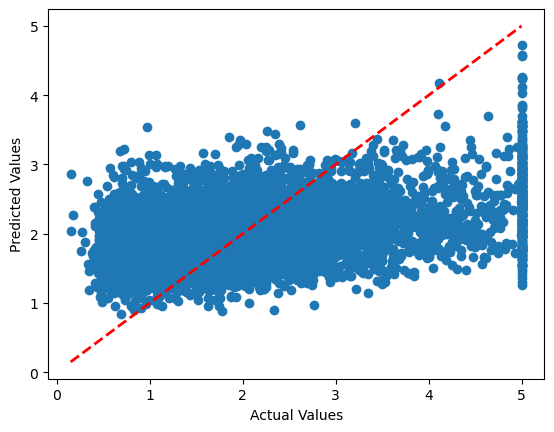

In [42]:
plt.scatter(y_test, knn.predict(X_test))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA. Choose n_components based on your analysis or set a variance threshold
pca = PCA(n_components=0.95)  
X_pca = pca.fit_transform(X_scaled)

X_pca

array([[ 1.88270434, -0.50336186, -0.31413445, -2.55509283,  0.12804027,
         0.48517721],
       [ 1.37111955, -0.12140565,  1.90525769, -1.8729835 , -0.26743002,
         0.60512257],
       [ 2.08686762, -0.5011357 , -0.93724479, -2.1001333 ,  0.37003189,
         1.15867615],
       ...,
       [ 1.40235696, -1.09642559,  0.56713524,  1.09039673, -0.32634693,
        -1.05218875],
       [ 1.5429429 , -1.05940835,  0.36547242,  0.96879894, -0.32324178,
        -1.12158069],
       [ 1.40551621, -0.89672727,  0.89681183,  0.90023653, -0.30936172,
        -0.81877823]])

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

knn_v2 = KNeighborsRegressor(n_neighbors=5)
knn_v2.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error

print('MAE:', metrics.mean_absolute_error(y_test, knn_v2.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, knn_v2.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, knn_v2.predict(X_test))))
print("R-squared:", r2_score(y_test, knn_v2.predict(X_test)))

MAE: 0.512790929263566
MSE: 0.5353785534930213
RMSE: 0.7316956699974528
R-squared: 0.5914416320531346


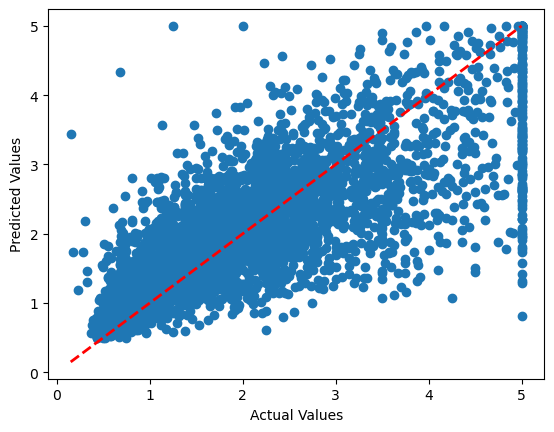

In [45]:
plt.scatter(y_test, knn_v2.predict(X_test))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [46]:
print(f'Number of components chosen: {pca.n_components_}')

Number of components chosen: 6


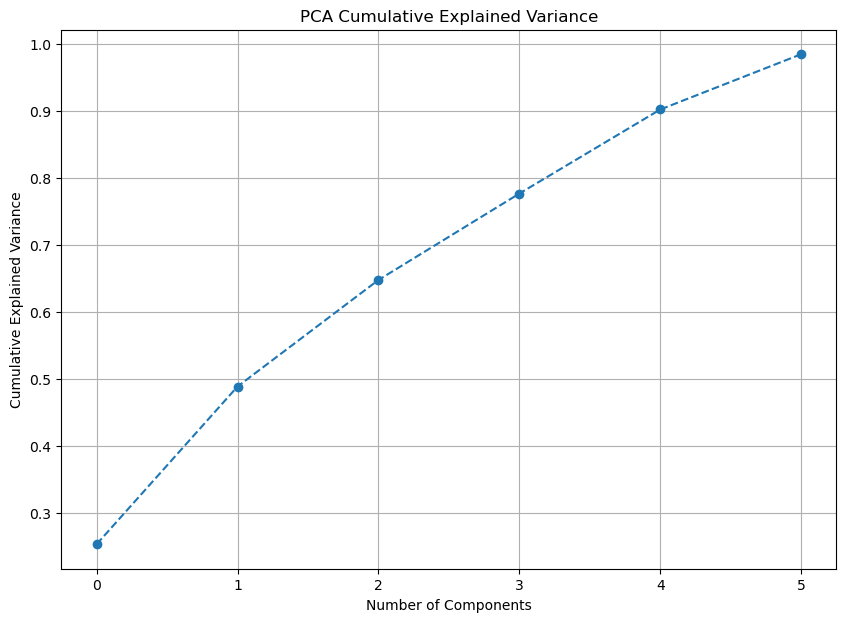

In [47]:
cumulative_var = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 7))
plt.plot(cumulative_var, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.show()

### Results of improved model (KNN Post-PCA)

After applying Principal Component Analysis (PCA) to the dataset, our K-Nearest Neighbors (KNN) model yields the following metrics:

**MAE (Mean Absolute Error)** of 0.513: On average, predictions are off by $51,279 from actual housing values. Compared to the pre-PCA model, this MAE is smaller, suggesting an improvement in prediction accuracy.

**MSE (Mean Squared Error)** of 0.535: This translates to an average squared prediction error of about $53,538. Although still indicative of substantial errors, it shows a slight improvement over the original model.

**RMSE (Root Mean Squared Error)** of 0.732: The average error magnitude is approximately $73,170, which is an improvement and suggests that PCA may have helped in reducing the impact of large errors.

**R-squared** of 0.591: The model now explains about 59 percent of the variance in housing prices, a modest increase from the previous model, indicating a better fit to the data.

#### The Role of PCA in Model Performance
PCA is a dimensionality reduction technique that can improve model performance, especially for algorithms like KNN that are sensitive to the curse of dimensionality. Here's how PCA could have contributed to the performance changes:

**Noise Reduction**: By reducing the dataset to its principal components, PCA helps to eliminate noise and less relevant information that might have been confusing the KNN model earlier.

**Feature Correlations**: PCA transforms the original features into a set of linearly uncorrelated components. This can help in cases where multicollinearity might affect the model's ability to learn from the data effectively.

**Computational Efficiency**: Reducing the number of dimensions makes the KNN algorithm faster and often more accurate, as it can focus on the most informative aspects of the data.

**Outlier Mitigation**: PCA can sometimes lessen the influence of outliers, which can disproportionately affect KNN's performance due to its reliance on the distance between data points.

#### Interpretation in Context
While the application of PCA has led to a noticeable improvement in the KNN model's predictive accuracy and fit, the results still indicate room for enhancement. The model's performance has benefited from the distilled features, reflected in the decreased MAE and RMSE and the increased R-squared value. However, the metrics suggest that further model refinement or the selection of alternative modeling techniques may yield even better results.

In conclusion, PCA has provided a valuable step in refining our KNN model, highlighting its ability to improve machine learning outcomes by focusing on the most salient features of the dataset. Despite these advances, stakeholders should continue to explore additional ways to capture the complexity of California's housing market more effectively.

## Phase 6: Random Forest Regression

Next, we will be training and testing the Random Forest Regression Algorithm. I hypothesize that Random Forest Regression model will be the best for this dataset for a couple of reasons. 

1. **Handling Non-Linearity**:
- Random Forest, being a non-linear model, can handle complex relationships between features and the target variable without requiring the data to fit a specific linear form. It aggregates multiple decision trees to improve predictive performance and control over-fitting.
2. **Feature Interactions**:
- Random Forest builds upon the concept of decision trees but introduces randomness in the tree-building process. By averaging multiple deep decision trees (each trained on different subsets of the data and features), it captures feature interactions while mitigating the risk of overfitting, making it a powerful tool for prediction.
3. **Robustness to Outliers**:
- Random Forest is more robust to outliers since the ensemble of trees limits the impact any single outlier can have on the overall model.
4. **Feature Importance**:
- Random Forest provides insights into feature importance—how much each feature contributes to the prediction. This can be particularly useful for understanding which factors most significantly affect housing prices in California, offering valuable insights beyond mere prediction.
6. **Generalization**:
- Random Forest generally offers better generalization to unseen data compared to a single Decision Tree due to its ensemble approach. By averaging the predictions of numerous trees, it reduces the variance part of the error, which is typically the issue with single decision trees.

### Phase 6.a: Training and Testing Random Forest

In [57]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
df_rf = pd.DataFrame(california_df, columns=col_labels)
df_rf['Med_value'] = target

X = df_rf.drop('Med_value', axis=1)  
y = df_rf['Med_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestRegressor(n_estimators=200, random_state=42)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, rf.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, rf.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf.predict(X_test))))
print('R-squared:', r2_score(y_test, rf.predict(X_test)))

MAE: 0.3304141110303621
MSE: 0.25355774432775086
RMSE: 0.5035451760544934
R-squared: 0.8068190504669066
[CV] END ....................max_depth=None, n_estimators=50; total time=   3.8s
[CV] END ...................max_depth=None, n_estimators=100; total time=   7.8s
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.5s
[CV] END ......................max_depth=10, n_estimators=50; total time=   2.7s
[CV] END .....................max_depth=10, n_estimators=100; total time=   5.4s
[CV] END .....................max_depth=10, n_estimators=200; total time=  11.0s
[CV] END .....................max_depth=20, n_estimators=100; total time=   8.4s
[CV] END ......................max_depth=30, n_estimators=10; total time=   0.9s
[CV] END ......................max_depth=30, n_estimators=50; total time=   4.2s
[CV] END ......................max_depth=30, n_estimators=50; total time=   4.2s
[CV] END .....................max_depth=30, n_estimators=100; total time=   8.4s
[CV] 

### Model Diagnostics (Random Forest)

As hypothesized, Random Forest model shows better performance than the previous two models (Linear Regression and KNN). Mainly, this is due to the flexibility on how the model handles nonlinear data. In model diagnostics, we plan to take a look at not only the model's performance, but also the feature importance in order to uncover insights into which varaibles provide the most weight when making the predictions using Random Forest model. 

<br> After doing so, we will be performing cross validation to find the best hyperparameters (max_depth and n_estimators). By performing this validation, we can fine tune the model to make more accurate prediction, and, ultimately, improve the models performance. 

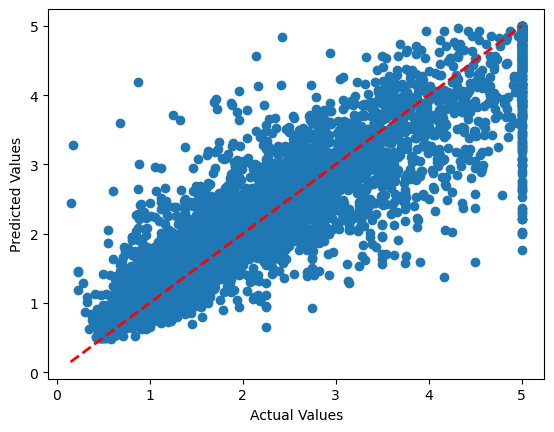

In [51]:
plt.scatter(y_test, rf.predict(X_test))

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.show()

In [52]:
importances = rf.feature_importances_
importances

array([0.52539968, 0.05469351, 0.04593294, 0.02985917, 0.03208918,
       0.13881873, 0.08651221, 0.08669459])

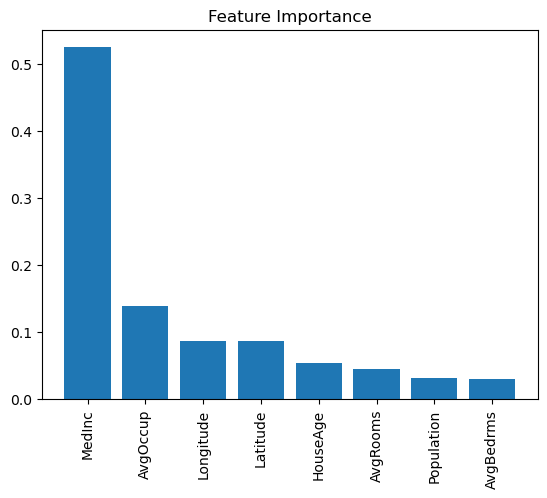

In [53]:
indices = np.argsort(importances)[::-1]
names = [X.columns[i] for i in indices]

plt.figure()
plt.title("Feature Importance")

plt.bar(range(X.shape[1]), importances[indices])

plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV

df_rf = pd.DataFrame(california_df, columns=col_labels)
df_rf['Med_value'] = target

X = df_rf.drop('Med_value', axis=1)  
y = df_rf['Med_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200],  
    'max_depth': [None, 10, 20, 30]  
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score (neg MSE):", grid_search.best_score_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/Users/seanpark/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/seanpark/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/seanpark/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/seanpark/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/seanpark/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning:

Best parameters: {'max_depth': None, 'n_estimators': 200}
Best score (neg MSE): -0.26737247427167105


From our 5 fold cross validation, we weren't able to find significant improvements in our model's performance in MSE with fine tuning in hyperparameters. However, it is important to note that the Random Forest model has significantly improved our performance metrics. Here is how those values are interpreted. 

<br> MAE: 0.3304141110303621
<br> MSE: 0.25355774432775086
<br> RMSE: 0.5035451760544934

**MAE (Mean Absolute Error)** of 0.330: This metric tells us that, on average, the model's predictions are off by approximately $33,041 from the actual prices. Given the context of real estate, where prices can range significantly, this level of accuracy is commendable and indicates the model's reliability in making close predictions.

**MSE (Mean Squared Error)** of 0.254: MSE gives us an idea of the squared average error, which in this case amounts to $25,356 (squared). The squaring of errors means this metric is sensitive to larger deviations, suggesting our model is quite adept at avoiding significant mistakes in prediction.

**RMSE (Root Mean Squared Error)** of 0.504: Converting the MSE into RMSE provides a clearer picture, translating to an average prediction error of 50,355. This metric is particularly useful because it's in the same unit as the target variable, offering a straightforward interpretation of the model's predictive accuracy.

**R-squared of 0.807**: With an R-squared value this high, our model explains approximately 80.7% of the variance in housing prices. This is a strong indication that the Random Forest model captures a substantial portion of the factors influencing housing prices, making it a robust tool for predictions in this domain.

#### Conclusion
The Random Forest model stands out as a potent predictive tool for the California housing market, balancing complexity with interpretability. Its ability to handle diverse data and extract key insights, alongside strong performance metrics, underscores its value in real estate analytics. For stakeholders, this translates to data-driven, reliable predictions that can inform investment decisions, policy making, and market analysis.

## Phase 7: Gradient Descent Algorithm 

The Gradient Boosting Algorithm is a sophisticated machine learning technique used for prediction tasks, such as estimating housing prices. It belongs to the family of ensemble methods, which improve predictions by combining the strengths of multiple models.

**Starting Point**: Gradient Boosting begins with a simple model, often a decision tree, which makes initial predictions about the target, like housing prices. This model is usually basic and serves as the foundation for subsequent improvements.

**Learning from Mistakes**: The core idea behind Gradient Boosting is to iteratively correct errors made by previous models. After the initial prediction, the algorithm examines where it went wrong—the discrepancies between actual prices and predicted prices. It then builds a new model focused on correcting these specific errors.

**Sequential Improvement**: Unlike other ensemble methods that build models in parallel, Gradient Boosting constructs models sequentially. Each new model is added to the ensemble with the aim of reducing the residual errors. It's akin to a continuous refinement process, where each step enhances the overall prediction accuracy by learning from the residuals—errors not yet accounted for by the existing ensemble of models.

**Controlled Learning**: An important aspect of Gradient Boosting is the 'learning rate,' which determines how much each new model influences the overall prediction. A lower learning rate means the algorithm takes smaller, more cautious steps towards improvement, potentially leading to a more robust model that generalizes better to unseen data.

**Stopping Criteria**: The process continues until a specified number of models are added or improvements fall below a certain threshold. This iterative approach allows Gradient Boosting to effectively capture complex patterns and relationships within the data.

#### Advantages Over Other Models:

Compared to Linear Regression, Gradient Boosting can model complex nonlinear relationships without needing the data to be transformed or assumptions about the distribution of variables.

While Random Forest builds trees independently, Gradient Boosting's sequential correction of errors allows for more nuanced adjustments to the model, often resulting in superior performance on challenging datasets.
Why Learning Rate and Max Depth Matter:

**Learning Rate**: Balances the speed of learning with the risk of overfitting. A carefully chosen rate ensures that each new model corrects errors without rushing, leading to a more generalized model.

**Max Depth**: Restricts the complexity of individual trees. Shallower trees reduce overfitting risk but might capture less detail, while deeper trees can model more complex patterns but may overfit.
Gradient Boosting in Our Project:

For the California housing price data, Gradient Boosting has shown to be highly effective, significantly outperforming simpler models. By focusing on correcting past mistakes and adjusting for the complexity of the data, it offers nuanced insights into factors affecting housing prices.

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

df_gbr = pd.DataFrame(california_df, columns=col_labels)
df_gbr['Med_value'] = target

X = df_gbr.drop('Med_value', axis=1)  
y = df_gbr['Med_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

**MAE (Mean Absolute Error)** of 0.371: This implies that the model's predictions are, on average, $37,144 off from the actual housing prices. This level of accuracy represents a significant improvement over previous models, underscoring the algorithm's effectiveness in closely approximating real-world values.

**MSE (Mean Squared Error)** of 0.288: The MSE, translating to an average squared error of $28,836, highlights the model's capacity to minimize large errors in its predictions. This further attests to the model's precision.

**RMSE (Root Mean Squared Error)** of 0.537: With an RMSE of $53,699, this metric confirms the model's strong predictive accuracy. The RMSE provides a clear picture of the model's performance in the same units as the target variable, making it evident that the Gradient Boosting Algorithm reliably predicts housing prices within a relatively narrow margin of error.

**R-squared** of 0.780: An R-squared value of 78 percent indicates that the model explains a substantial majority of the variance in housing prices. This high level of explanatory power demonstrates the model's effectiveness in capturing the key factors that influence housing prices in California.

#### Contextual Interpretation

The Gradient Boosting Algorithm's performance metrics showcase its superior predictive capabilities. Compared to simpler models, such as Linear Regression or KNN, Gradient Boosting offers enhanced accuracy and a deeper understanding of the data. The substantial decrease in MAE and RMSE, coupled with a high R-squared value, signifies that this model can be trusted to make well-informed predictions about housing prices.

This algorithm's success can be attributed to its ability to sequentially correct its own mistakes, using multiple decision trees to refine its predictions progressively. Unlike models that may struggle with complex relationships or non-linearity in the data, Gradient Boosting excels by integrating multiple weak predictors into a cohesive, strong model.

#### Conclusion
Our application of the Gradient Boosting Algorithm to predict California housing prices has proven highly effective. By accurately capturing the nuances of the housing market and minimizing prediction errors, this model stands out as a robust tool for real estate valuation. Stakeholders looking to understand or predict housing prices will find the Gradient Boosting model to be a reliable and insightful resource.

Its superior performance, characterized by low error rates and high explanatory power, underscores the value of advanced ensemble methods in tackling complex predictive tasks. Future enhancements could explore tuning additional hyperparameters or incorporating more diverse data to further refine the model's accuracy.

In [61]:
print('MAE:', metrics.mean_absolute_error(y_test, gbr.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, gbr.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr.predict(X_test))))
print('R-squared:', r2_score(y_test, gbr.predict(X_test)))

MAE: 0.37144609147335444
MSE: 0.28836337869645623
RMSE: 0.5369947659860906
R-squared: 0.7803012822391022


### Model Diagnostics (Gradient Boosting Regression V1)

Let's explore the results of our Gradient Boosting Regression with the default hyperparameters. First off, the performance metrics seem to be moderate in terms in comparison to the Random Forest model. Gradient Boosting Algorithm, however, have two important hyperparameters, max_depth and learning_rate that we want to tune. By performing cross-validation, we will be able to identify the best parameters for our MSE metric. After performing the cross-validation, we will retrain our model and present our findings of the results.

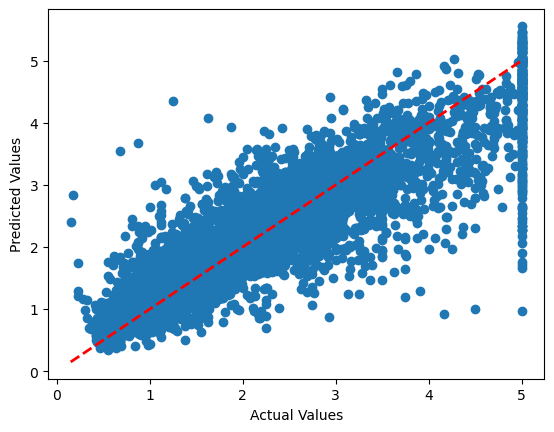

In [62]:
plt.scatter(y_test, gbr.predict(X_test))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [73]:
feature_importance = gbr.feature_importances_
feature_importance

array([0.53545627, 0.04603408, 0.03580921, 0.01886961, 0.02008745,
       0.13416548, 0.10483916, 0.10473874])

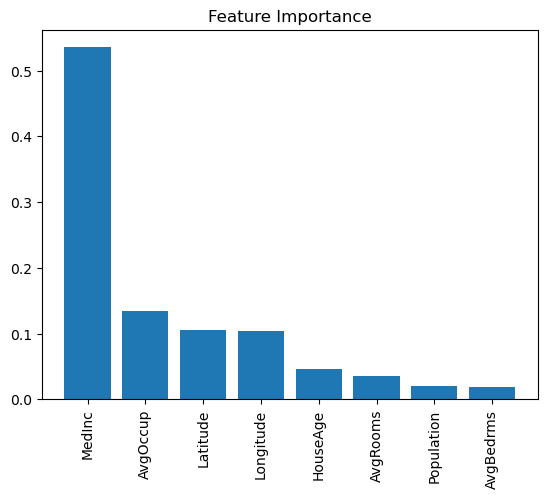

In [76]:
indices = np.argsort(feature_importance)[::-1]
names = [X.columns[i] for i in indices]

plt.figure()
plt.title("Feature Importance")

plt.bar(range(X.shape[1]), feature_importance[indices])

plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()

### Cross-Validation to find best hyperparameters (max_depth and learning_rate)

In [64]:
param_grid = {
    'max_depth': [5, 6, 7, 8],  # Example depths
    'learning_rate': [0.1, 0.15, 0.2, 0.25]  # Example learning rates
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (negative MSE): ", grid_search.best_score_)

# Optionally, evaluate the best model on the test set
best_gbr = grid_search.best_estimator_
test_score = best_gbr.score(X_test, y_test)
print("R^2 of the best model on the test set: ", test_score)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'learning_rate': 0.15, 'max_depth': 7}
Best cross-validation score (negative MSE):  -0.23005294990221622
R^2 of the best model on the test set:  0.8365945068548933


In [66]:
gbr_v2 = GradientBoostingRegressor(random_state=42, max_depth = 7, learning_rate = 0.15)
gbr_v2.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.15, max_depth=7, random_state=42)

In [67]:
print('MAE:', metrics.mean_absolute_error(y_test, gbr_v2.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, gbr_v2.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_v2.predict(X_test))))
print('R-squared:', r2_score(y_test, gbr_v2.predict(X_test)))

MAE: 0.304991775911703
MSE: 0.21447626359005584
RMSE: 0.46311582092394105
R-squared: 0.8365945068548933


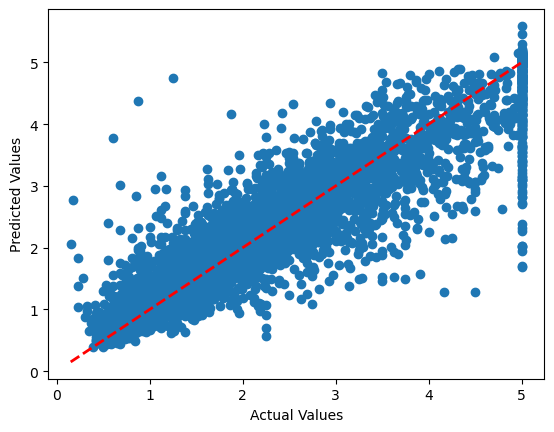

[CV] END ....................learning_rate=0.01, max_depth=3; total time=   2.6s
[CV] END ....................learning_rate=0.01, max_depth=5; total time=   4.4s
[CV] END ....................learning_rate=0.01, max_depth=6; total time=   5.1s
[CV] END .....................learning_rate=0.1, max_depth=5; total time=   4.4s
[CV] END .....................learning_rate=0.1, max_depth=6; total time=   5.1s
[CV] END .....................learning_rate=0.2, max_depth=4; total time=   3.6s
[CV] END .....................learning_rate=0.2, max_depth=6; total time=   4.9s
[CV] END .....................learning_rate=0.1, max_depth=5; total time=   4.2s
[CV] END .....................learning_rate=0.1, max_depth=7; total time=   5.9s
[CV] END .....................learning_rate=0.1, max_depth=8; total time=   6.8s
[CV] END ....................learning_rate=0.15, max_depth=7; total time=   6.1s
[CV] END ....................learning_rate=0.15, max_depth=8; total time=   7.1s
[CV] END ...................

[CV] END ....................learning_rate=0.01, max_depth=3; total time=   2.6s
[CV] END ....................learning_rate=0.01, max_depth=4; total time=   3.4s
[CV] END ....................learning_rate=0.01, max_depth=6; total time=   5.1s
[CV] END .....................learning_rate=0.1, max_depth=4; total time=   3.5s
[CV] END .....................learning_rate=0.1, max_depth=6; total time=   5.1s
[CV] END .....................learning_rate=0.2, max_depth=3; total time=   2.7s
[CV] END .....................learning_rate=0.2, max_depth=5; total time=   4.5s
[CV] END .....................learning_rate=0.1, max_depth=5; total time=   4.2s
[CV] END .....................learning_rate=0.1, max_depth=6; total time=   5.0s
[CV] END .....................learning_rate=0.1, max_depth=8; total time=   6.9s
[CV] END ....................learning_rate=0.15, max_depth=6; total time=   5.2s
[CV] END ....................learning_rate=0.15, max_depth=8; total time=   7.0s
[CV] END ...................

In [68]:
plt.scatter(y_test, gbr_v2.predict(X_test))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [77]:
feature_importance_v2 = gbr_v2.feature_importances_
feature_importance_v2

array([0.53545627, 0.04603408, 0.03580921, 0.01886961, 0.02008745,
       0.13416548, 0.10483916, 0.10473874])

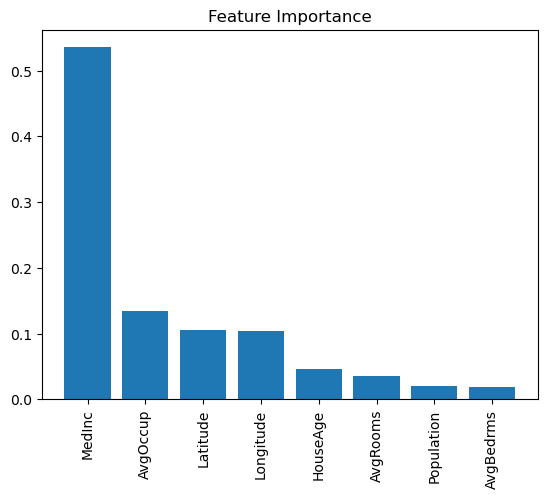

In [78]:
indices = np.argsort(feature_importance_v2)[::-1]
names = [X.columns[i] for i in indices]

plt.figure()
plt.title("Feature Importance")

plt.bar(range(X.shape[1]), feature_importance_v2[indices])

plt.xticks(range(X.shape[1]), names, rotation=90)

plt.show()

### Interpretation of Gradient Boosting Regressor

The feature importance graph indicates that the MedInc feature is the most significant predictor of housing prices in the California housing market. This suggests that income levels have a substantial influence on housing prices, which aligns with economic intuition—areas with higher median incomes are likely to have more expensive houses.

Other features like AvgOccup (average house occupancy), Latitude, and Longitude also contribute to the model's predictive power to a lesser extent. This reflects the role of location and density in real estate valuation, with geographical coordinates capturing the locational desirability.

The model's performance metrics provide further confidence in its predictive ability:

- MAE (Mean Absolute Error) of 0.305: On average, the model's predictions deviate from the actual values by about 0.305. Given the scale of housing prices, this level of error is relatively low, indicating good predictive accuracy.
- MSE (Mean Squared Error) of 0.214: The squared nature of MSE gives a heavier penalty to larger errors, suggesting that the model does not frequently make large mistakes in its predictions.
- RMSE (Root Mean Squared Error) of 0.463: As the square root of MSE, RMSE is particularly useful because it is expressed in the same units as the target variable. A value of 0.463, in the context of housing prices, demonstrates the model's strong predictive capability.
- R-squared of 0.837: This high R-squared value indicates that approximately 83.7% of the variability in housing prices is explained by the model, which is a robust level of explanatory power.

The scatter plot of actual vs. predicted values, with the majority of points clustering along the reference line, visually confirms the model's efficacy. While there is some spread indicative of prediction errors, the close alignment demonstrates that the model predictions are generally in agreement with the actual values.

In summary, the Gradient Boosting Regressor has proven to be an effective model for predicting California housing prices, with particular emphasis on median income as a key predictor. The model's performance is strong, with low errors and a high proportion of variance explained, suggesting it could be a valuable tool for stakeholders in the real estate market seeking to understand price determinants.

## Conclusion

In our experiment to predict California housing prices, we've evaluated four different machine learning models: Linear Regression, K-Nearest Neighbors (KNN), Random Forest, and Gradient Boosting. Each model brings its own strengths to the table, as evidenced by their performance metrics:

**Linear Regression** demonstrated decent predictive power with an MAE of 0.4880 and an R-squared of 0.6624. It serves as a good baseline, offering a straightforward interpretation of the results. However, it was outperformed by more complex models, suggesting that the relationships in the data are not entirely linear.

**KNN** had an MAE of 0.5127 and an R-squared of 0.5914, indicating that it was less accurate than the other models. This could be due to KNN's sensitivity to the scale of the data and irrelevant features, which might have hindered its performance despite PCA's dimensionality reduction.

**Random Forest** showed a marked improvement, with an MAE of 0.3304 and an R-squared of 0.8068. This model was able to capture more complex patterns in the data, likely due to its ensemble approach that averages multiple decision trees to reduce overfitting and improve generalization.

**Gradient Boosting** delivered the best performance with the lowest MAE of 0.3049 and the highest R-squared of 0.8366. This model's sequential approach to learning from previous errors and adjusting for them proved to be highly effective in modeling the intricate factors that affect housing prices.

The results clearly indicate that ensemble methods like Random Forest and Gradient Boosting are superior for this task, given their ability to handle the data's complexity and non-linear relationships. Gradient Boosting stands out as the most effective model, striking an optimal balance between error minimization (MAE) and variance explanation (R-squared). While Linear Regression provides a solid baseline and KNN offers an alternative approach, the ensemble models' robustness makes them the preferred choice for stakeholders looking to make accurate predictions in the dynamic California housing market.

In [81]:
models = ['Linear Regression', 'KNN', 'Random Forest', 'Gradient Descent']
mae = [0.488, 0.5127, 0.3304, 0.3049]
Rsquared = [0.6624, 0.5914, 0.8068, 0.8366]

conclusion = pd.DataFrame({'Models': models, 'MAE': mae, 'R-squared': Rsquared})
conclusion

Models     MAE  R-squared
0  Linear Regression  0.4880     0.6624
1                KNN  0.5127     0.5914
2      Random Forest  0.3304     0.8068
3   Gradient Descent  0.3049     0.8366